<a href="https://colab.research.google.com/github/rdntmsn/Harmony360/blob/main/Harmonyv10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ============================================================
# Harmony360 V10 – Core dependencies (≈ 10 s cold start)
# ============================================================
!pip install numpy scipy sympy loguru --quiet

In [ ]:
!pip install transformers scikit-learn reflex --quiet

In [ ]:
# === 🗂️ MOUNT GOOGLE DRIVE (OPTIONAL FOR COLAB USERS) ===
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# === HARMONY360 V10: SETUP & SYNCHRONIZER ===

import os
import json
import math
import numpy as np
from pathlib import Path
from datetime import datetime
from functools import wraps
from loguru import logger
from scipy.constants import c, hbar, pi as PI
from typing import Sequence, List, Tuple

# === CORE CONSTANTS ===
PHI = (1 + np.sqrt(5)) / 2  # Golden ratio
PI = np.pi                  # Pi constant
ALPHA = 1 / 137             # Fine-structure constant
PLANCK_LENGTH = 1.616255e-35  # Planck length (m)

# === DIRECTORIES (Ensure these paths are created) ===
BASE_DIR = Path("./harmony360v10")
DATA_DIR = BASE_DIR / "data"
MODEL_DIR = BASE_DIR / "models"
SNAPSHOT_DIR = BASE_DIR / "snapshots"
HARAI_DIR = BASE_DIR / "harai"

for d in [DATA_DIR, MODEL_DIR, SNAPSHOT_DIR, HARAI_DIR]:
    d.mkdir(parents=True, exist_ok=True)

# === HARMONY360 SNAPSHOT DECORATOR ===
def h360_sync(snapshot_type="general", notes="Automated Harmony360 operation"):
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            logger.info(f"🔄 Starting Harmony360 synced function: {func.__name__}")
            print(f"\n=== 🚀 Running Harmony360 Operation: {func.__name__} ===")

            result = func(*args, **kwargs)

            # === Snapshot ===
            snapshot_id = datetime.now().strftime("%Y%m%d%H%M%S")
            snapshot_path = SNAPSHOT_DIR / f"{func.__name__}_snapshot_{snapshot_id}.har360"
            snapshot_data = {
                "metadata": {
                    "type": snapshot_type,
                    "timestamp": snapshot_id,
                    "source": func.__name__,
                    "notes": notes
                },
                "content": result
            }

            try:
                with open(snapshot_path, "w") as f:
                    json.dump(snapshot_data, f, indent=2)
                logger.success(f"💾 Snapshot saved: {snapshot_path}")
            except Exception as e:
                logger.error(f"❌ Failed to save snapshot: {e}")

            # === HARAI Index Update ===
            harai_index_path = HARAI_DIR / "HARAI_INDEX.json"
            entry = {
                "id": snapshot_id,
                "file": str(snapshot_path),
                "description": notes,
                "timestamp": snapshot_id,
                "source_function": func.__name__
            }

            try:
                if harai_index_path.exists():
                    with open(harai_index_path, "r") as f:
                        index_data = json.load(f)
                else:
                    index_data = []

                index_data.append(entry)

                with open(harai_index_path, "w") as f:
                    json.dump(index_data, f, indent=2)

                logger.info("📓 HARAI index updated.")
            except Exception as e:
                logger.error(f"❌ HARAI index update failed: {e}")

            # === Monitoring Output ===
            print("\n=== ✅ Harmony360 Operation Summary ===")
            print(f"🔖 Snapshot ID     : {snapshot_id}")
            print(f"📂 Snapshot File   : {snapshot_path.name}")
            print(f"🧠 Source Function : {func.__name__}")
            print(f"📓 HARAI Entries   : {len(index_data)}")
            print(f"📝 Notes           : {notes}")
            print("📊 Output Preview  :", str(result)[:250], "..." if len(str(result)) > 250 else "")

            return result
        return wrapper
    return decorator

In [ ]:
class Harmony360v:
    __slots__ = ("phi", "pi", "alpha", "hbar", "c", "lp")

    def __init__(self):
        self.phi, self.pi, self.alpha = PHI, PI, ALPHA
        self.hbar, self.c, self.lp    = hbar, c, PLANCK_LENGTH

    def resonance_scaling_exponential(self, n, A=1, B=1, C=1):
        return A*self.phi**n + B*self.pi**n + C*(self.phi*self.pi)**(n/2)

    def resonance_scaling_wave(self, theta, A=1, B=1, C=1):
        return A*np.sin(3*theta) + B*np.cos(6*theta) + C*np.sin(9*theta)

    def R_369(self, t): return np.sin(3*t) + np.cos(6*t) + np.sin(9*t)

    def phi_pi_modulation(self, f):
        return 0.0 if not np.isfinite(f) else np.sin(2*self.pi*f/self.phi)

    def fractal_harmonic_wavefield(self, x, y):
        return 0.5*((1+self.phi)*np.sin(3*x*(1+self.phi)/2) + np.cos(6*y*self.pi/2))

    def fractal_harmonic_projection(self, x, y):
        return (self.phi*x + self.pi*y, self.phi*y - self.pi*x)

    def golden_spiral(self, angle):
        r = self.phi ** angle
        return (r*math.cos(angle), r*math.sin(angle))

    def dynamic_resonant_power_transfer(self, E, t, T):
        return E*(1+np.sin(self.pi*self.phi*t)/self.phi)*self.R_369(t)*np.cos(2*self.pi*t/T)

    def standard_power_transfer(self, E, t, T):
        return E*np.cos(2*self.pi*t/T)

    def coherence_score(self, values: Sequence[float]) -> float:
        arr = np.asarray(values, dtype=float)
        if arr.size == 0 or np.isnan(arr).any() or np.all(arr == 0): return 0.0
        score = 1.0 - np.std(arr)/(np.mean(arr)+1e-9)
        return float(np.clip(score, 0.0, 1.0))

    def harmonic_entropy(self, freq_array: Sequence[float]) -> float:
        norm = np.asarray(freq_array, dtype=np.float64)
        norm = norm[np.isfinite(norm)]
        if norm.size == 0: return 0.0
        total = float(np.sum(np.abs(norm)))
        if total <= 0: return 0.0
        norm /= total
        entropy = -np.sum(norm*np.log2(norm+1e-12))
        return float(np.clip(entropy, 0.0, np.log2(norm.size+1e-9)))

    def generate_primes(self, n: int) -> List[int]:
        if not SYMBOLIC_ENABLED: raise ImportError("SymPy is required.")
        primes, p = [], 2
        while len(primes) < n:
            if isprime(p): primes.append(p)
            p += 1
        return primes

    def fractal_gamma(self, p: int) -> float:
        return math.log(p)/(self.phi*self.pi)

    def harmonic_frequency(self, p: int) -> complex:
        try: return 1/(p**(0.5 + 1j*self.fractal_gamma(p)))
        except Exception: return 0j

    def prime_resonance_function(self, primes: List[int], x: float) -> complex:
        try: return sum(np.exp(2j*self.pi*self.harmonic_frequency(p)*x) for p in primes)
        except Exception: return 0j

    def harmonic_laplace_constraint(self, H_s: Sequence[float], lambd: float):
        H_s = np.asarray(H_s, dtype=np.float64)
        if H_s.size < 2: return np.zeros_like(H_s)
        laplacian = np.gradient(np.gradient(H_s))
        return laplacian + lambd*H_s

    def log_derivative_zeta(self, s: complex, primes: List[int]):
        try: return np.array([-sum(math.log(p)/(p**s - 1 + 1e-12) for p in primes)])
        except Exception: return np.zeros(1)

    def riemann_zeta_resonance(self, s: complex, primes: List[int]):
        return self.harmonic_laplace_constraint(self.log_derivative_zeta(s, primes), lambd=1)

    def prime_phase_function(self, x: float) -> float:
        return 0.0 if x <= 0 else self.phi*math.log(x)/self.pi

    def prime_wave_function(self, x: float, A=1) -> complex:
        return A*np.exp(1j*self.prime_phase_function(x))

In [ ]:


# === HARMONY360 CORE CLASS ===

try:
    from sympy import isprime
    SYMBOLIC_ENABLED = True
except ImportError:
    SYMBOLIC_ENABLED = False

class Harmony360:
    """
    Harmony360 Core Class – Unified Resonance Engine
    Provides harmonic scaling, fractal mapping, entropy analysis,
    quantum energy modeling, and symbolic resonance tools.
    """

    def __init__(self):
        self.phi = PHI
        self.pi = PI
        self.alpha = ALPHA
        self.hbar = hbar
        self.c = c
        self.lp = PLANCK_LENGTH

    # === RESONANCE FUNCTIONS ===
    def resonance_scaling_exponential(self, n, A=1, B=1, C=1):
        return A * (self.phi ** n) + B * (self.pi ** n) + C * ((self.phi * self.pi) ** (n / 2))

    def resonance_scaling_wave(self, theta, A=1, B=1, C=1):
        return A * np.sin(3 * theta) + B * np.cos(6 * theta) + C * np.sin(9 * theta)

    def R_369(self, t):
        return np.sin(3 * t) + np.cos(6 * t) + np.sin(9 * t)

    def phi_pi_modulation(self, f):
        if not np.isfinite(f):
            return 0.0
        return np.sin(2 * self.pi * f / self.phi)

    # === FRACTAL MAPPING ===
    def fractal_harmonic_wavefield(self, x, y):
        return 0.5 * ((1 + self.phi) * np.sin(3 * x * (1 + self.phi) / 2) + np.cos(6 * y * self.pi / 2))

    def fractal_harmonic_projection(self, x, y):
        return (self.phi * x + self.pi * y, self.phi * y - self.pi * x)

    def golden_spiral(self, angle):
        r = self.phi ** angle
        return (r * math.cos(angle), r * math.sin(angle))

    # === ENERGY SYSTEMS ===
    def dynamic_resonant_power_transfer(self, E, t, T):
        return E * (1 + np.sin(self.pi * self.phi * t) / self.phi) * self.R_369(t) * np.cos((2 * self.pi * t) / T)

    def standard_power_transfer(self, E, t, T):
        return E * np.cos((2 * self.pi * t) / T)

    # === RESONANCE METRICS ===
    def coherence_score(self, values: Sequence[float]) -> float:
        arr = np.array(values, dtype=float)
        if len(arr) == 0 or np.isnan(arr).any() or np.all(arr == 0):
            return 0.0
        score = 1.0 - np.std(arr) / (np.mean(arr) + 1e-9)
        return max(0.0, min(1.0, score))

    def harmonic_entropy(self, freq_array: Sequence[float]) -> float:
        freq_array = np.asarray(freq_array, dtype=np.float64)
        freq_array = freq_array[np.isfinite(freq_array)]
        if freq_array.size == 0:
            return 0.0
        norm = np.abs(freq_array)
        total = np.sum(norm)
        if total <= 0 or not np.isfinite(total):
            return 0.0
        norm /= total
        entropy = -np.sum(norm * np.log2(norm + 1e-12))
        return np.clip(entropy, 0.0, np.log2(len(norm) + 1e-9))

    # === PRIME RESONANCE ANALYSIS ===
    def generate_primes(self, n: int) -> List[int]:
        if not SYMBOLIC_ENABLED:
            raise ImportError("SymPy is required for symbolic prime generation.")
        primes = []
        p = 2
        while len(primes) < n:
            if isprime(p):
                primes.append(p)
            p += 1
        return primes

    def fractal_gamma(self, p: int) -> float:
        return np.log(p) / (self.phi * self.pi)

    def harmonic_frequency(self, p: int) -> complex:
        try:
            return 1 / (p ** (0.5 + 1j * self.fractal_gamma(p)))
        except Exception:
            return 0 + 0j

    def prime_resonance_function(self, primes: List[int], x: float) -> complex:
        try:
            return sum(np.exp(2j * self.pi * self.harmonic_frequency(p) * x) for p in primes)
        except Exception:
            return 0 + 0j

    def harmonic_laplace_constraint(self, H_s: Sequence[float], lambd: float) -> np.ndarray:
        H_s = np.array(H_s, dtype=np.float64)
        if H_s.size < 2:
            return np.zeros_like(H_s)
        laplacian = np.gradient(np.gradient(H_s))
        return laplacian + lambd * H_s

    def log_derivative_zeta(self, s: complex, primes: List[int]) -> np.ndarray:
        try:
            return np.array([
                -sum(np.log(p) / (p ** s - 1 + 1e-12) for p in primes)
            ])
        except Exception:
            return np.zeros(1)

    def riemann_zeta_resonance(self, s: complex, primes: List[int]) -> np.ndarray:
        return self.harmonic_laplace_constraint(self.log_derivative_zeta(s, primes), lambd=1)

    def prime_phase_function(self, x: float) -> float:
        if x <= 0:
            return 0.0
        return self.phi * np.log(x) / self.pi

    def prime_wave_function(self, x: float, A=1) -> complex:
        return A * np.exp(1j * self.prime_phase_function(x))

In [ ]:
import re
import pickle
import joblib
from typing import List, Dict, Any, Union
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier

class Harmony360Trainer:
    """
    AI Training system for Harmony360 framework.
    Handles ingestion and learning from .har360 documents.
    """

    def __init__(self, data_dir: Union[str, Path]):
        self.data_dir = Path(data_dir)
        self.vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
        self.pca = PCA(n_components=50)
        self.cluster_model = KMeans(n_clusters=5)
        self.classifier = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300)
        self.training_data: List[Dict[str, Any]] = []
        logger.info("📚 Harmony360Trainer initialized.")

    def ingest_document(self, path: Union[str, Path]):
        """Load a single .har360 JSON file and add to dataset."""
        with open(path, 'r') as f:
            data = json.load(f)
        content = data.get("content", "")
        metadata = data.get("metadata", {})
        self.training_data.append({
            "content": content,
            "metadata": metadata,
            "path": str(path)
        })

    def preprocess(self) -> List[str]:
        """Clean and extract content for vectorization."""
        texts = [doc["content"] for doc in self.training_data]
        cleaned = [self.clean_text(t) for t in texts]
        return cleaned

    def clean_text(self, text: str) -> str:
        """Strip junk from input text."""
        return re.sub(r"[^\w\s\.\-\_\(\)\[\]]+", " ", text.lower())

    def train_model(self):
        """Run full training pipeline."""
        if not self.training_data:
            logger.warning("🚫 No data to train on.")
            return

        texts = self.preprocess()
        X = self.vectorizer.fit_transform(texts).toarray()
        X_pca = self.pca.fit_transform(X)
        y = [hash(doc["metadata"].get("title", "untitled")) % 5 for doc in self.training_data]

        self.cluster_model.fit(X_pca)
        self.classifier.fit(X_pca, y)
        logger.success("🧠 Harmony360 AI models trained.")

        # Save models
        joblib.dump(self.vectorizer, MODEL_DIR / "vectorizer.pkl")
        joblib.dump(self.pca, MODEL_DIR / "pca.pkl")
        joblib.dump(self.cluster_model, MODEL_DIR / "cluster.pkl")
        joblib.dump(self.classifier, MODEL_DIR / "classifier.pkl")
        logger.info("💾 AI components saved.")

    def predict(self, new_text: str) -> Dict[str, Any]:
        """Make a prediction on new input."""
        x = self.vectorizer.transform([self.clean_text(new_text)]).toarray()
        x_pca = self.pca.transform(x)
        cluster = self.cluster_model.predict(x_pca)[0]
        category = self.classifier.predict(x_pca)[0]
        return {"cluster": cluster, "category": category}

In [ ]:
@h360_sync(snapshot_type="training", notes="Trainer run and model update")
def update_harmony360ai_and_snapshot():
    logger.info("🚀 Starting Harmony360AI training and sync...")

    trainer = Harmony360Trainer(DATA_DIR)
    har360_files = list(Path(DATA_DIR).glob("*.har360"))

    if not har360_files:
        logger.warning("⚠️ No .har360 files found.")
        return {"status": "no_files", "message": "No .har360 files found."}

    for file in har360_files:
        try:
            trainer.ingest_document(str(file))
            logger.info(f"📥 Ingested {file.name}")
        except Exception as e:
            logger.error(f"❌ Failed to ingest {file.name}: {e}")

    trainer.train_model()
    logger.success("🧠 Model training completed.")

    model_path = Path(MODEL_DIR) / "ai_model.pkl"
    with open(model_path, "wb") as f:
        pickle.dump({
            "vectorizer": trainer.vectorizer,
            "classifier": trainer.classifier,
            "cluster_model": trainer.cluster_model
        }, f)

    snapshot_id = datetime.now().strftime("%Y%m%d%H%M%S")
    snapshot_path = Path(SNAPSHOT_DIR) / f"ai_snapshot_{snapshot_id}.har360"
    snapshot_data = {
        "metadata": {
            "type": "ai_snapshot",
            "timestamp": snapshot_id,
            "source": "Harmony360Trainer",
            "vectorizer": "TfidfVectorizer",
            "clusters": 5,
            "notes": "Post-ingestion training snapshot."
        },
        "content": f"Trainer has ingested and trained on {len(trainer.training_data)} documents."
    }
    with open(snapshot_path, "w") as f:
        json.dump(snapshot_data, f, indent=2)

    # Update HARAI index
    harai_index_path = Path(HARAI_DIR) / "HARAI_INDEX.json"
    index_entry = {
        "id": snapshot_id,
        "file": str(snapshot_path),
        "documents_ingested": len(trainer.training_data),
        "timestamp": snapshot_id,
        "description": "Harmony360 AI snapshot"
    }

    if harai_index_path.exists():
        with open(harai_index_path, "r") as f:
            index_data = json.load(f)
    else:
        index_data = []

    index_data.append(index_entry)
    with open(harai_index_path, "w") as f:
        json.dump(index_data, f, indent=2)

    return {
        "documents_ingested": len(trainer.training_data),
        "snapshot": str(snapshot_path),
        "model_path": str(model_path),
        "harai_index": str(harai_index_path)
    }

In [ ]:
# from harmony360_core import Harmony360
# from harmony360_decorators import h360_sync
import numpy as np

class QuantumConsciousness(Harmony360):
    """
    Models the coherence of conscious fields using EEG-like data,
    applying fractal harmonic analysis and resonance scoring.
    """

    @h360_sync(snapshot_type="consciousness", notes="EEG coherence field calculated.")
    def coherence_field(self, eeg_data):
        """
        Measures coherence of EEG data input using Harmony360's resonance functions.

        Args:
            eeg_data (list or array): A 1D or 2D array of float EEG signal values.

        Returns:
            dict: {
                'coherence': float [0–1],
                'entropy': float,
                'waveform_analysis': list of floats,
                'field_projection': complex array,
            }
        """
        if isinstance(eeg_data, list):
            eeg_data = np.array(eeg_data)

        # Handle both 1D and 2D EEG-like inputs
        if eeg_data.ndim == 1:
            channels = [eeg_data]
        else:
            channels = eeg_data

        waveforms = []
        entropies = []
        projections = []

        for ch in channels:
            waveform = [self.R_369(t) * val for t, val in enumerate(ch)]
            entropy = self.harmonic_entropy(ch)
            projection = [self.fractal_harmonic_wavefield(x, x) for x in ch]

            waveforms.append(waveform)
            entropies.append(entropy)
            projections.append(projection)

        mean_entropy = float(np.mean(entropies))
        flat_signals = np.concatenate(channels)
        coherence = self.coherence_score(flat_signals)

        return {
            "coherence": round(coherence, 4),
            "entropy": round(mean_entropy, 4),
            "waveform_analysis": waveforms,
            "field_projection": projections
        }

In [ ]:
# from harmony360_core import Harmony360
# from harmony360_decorators import h360_sync
import numpy as np

class TLN369(Harmony360):
    """
    Simulates 3–6–9-based temporal lattice nodes and resonance grids.
    Each node tracks its ϕ–π-modulated oscillation state over time.
    """

    @h360_sync(snapshot_type="timeline", notes="TLN369 temporal grid simulation.")
    def simulate_grid(self, timesteps=100, node_count=27, mode="wave"):
        """
        Simulates TLN (Timeline Node) grid activity across time.

        Args:
            timesteps (int): Number of time steps to simulate
            node_count (int): Number of timeline nodes in the grid
            mode (str): "wave", "phase", or "resonance"

        Returns:
            dict: {
                "grid": 2D list of floats,
                "mode": str,
                "timesteps": int,
                "node_count": int,
                "coherence": float,
                "entropy": float
            }
        """
        t_space = np.linspace(0, 2 * self.pi, timesteps)
        node_space = np.linspace(0, 2 * self.pi, node_count)
        grid = []

        for t in t_space:
            row = []
            for n in node_space:
                if mode == "wave":
                    val = self.resonance_scaling_wave(t + n)
                elif mode == "phase":
                    val = self.phi_pi_modulation(t * n)
                elif mode == "resonance":
                    val = self.dynamic_resonant_power_transfer(E=1.0, t=t, T=2*self.pi)
                else:
                    raise ValueError("Invalid mode. Choose from: wave, phase, resonance.")
                row.append(val)
            grid.append(row)

        flat_vals = np.array(grid).flatten()
        return {
            "grid": grid,
            "mode": mode,
            "timesteps": timesteps,
            "node_count": node_count,
            "coherence": self.coherence_score(flat_vals),
            "entropy": self.harmonic_entropy(flat_vals)
        }

In [ ]:
# ============================================================
# 🎯 Harmony360 V10 Agent – FractalPrimes (Unified)
# ============================================================

import numpy as np
from sympy import isprime

class FractalPrimes(Harmony360):
    """
    Models prime-based harmonic metrics using φ–π scaling and partition resonance.
    Includes gamma transforms, prime wavefields, and partition identity scanning.
    """

    @h360_sync(snapshot_type="prime_fractal", notes="Compute fractal gamma metric over prime set.")
    def prime_fractal_metric(self, n_primes=1000):
        """
        Computes the fractal gamma metric for the first N primes.
        """
        primes = self.generate_primes(n_primes)
        gamma_values = [self.fractal_gamma(p) for p in primes]
        return {
            "primes": primes,
            "gamma_values": gamma_values,
            "coherence": self.coherence_score(gamma_values),
            "entropy": self.harmonic_entropy(gamma_values)
        }

    @h360_sync(snapshot_type="prime_waveform", notes="Visualize φ–π harmonic waveforms from primes.")
    def prime_wavefield(self, x_range=(0, 30), steps=500, n_primes=60):
        """
        Generates prime-wave harmonic field across range of x values.
        """
        x_vals = np.linspace(*x_range, steps)
        primes = self.generate_primes(n_primes)
        wave = [self.prime_resonance_function(primes, x) for x in x_vals]
        abs_wave = np.abs(wave)
        return {
            "x_values": x_vals.tolist(),
            "wave_values": abs_wave,
            "coherence": self.coherence_score(abs_wave),
            "entropy": self.harmonic_entropy(abs_wave)
        }

    @h360_sync(snapshot_type="resonance_scan", notes="Partition resonance-based prime scan.")
    def partition_prime_scan(self, start=2, end=100):
        """
        Detects primes using partition identity zeroing across a range.
        """
        N = np.arange(start, end + 1)
        values = np.array([prime_partition_identity(n) for n in N])
        primes = [int(n) for n, val in zip(N, values) if val == 0]
        return {
            "start": start,
            "end": end,
            "resonant_primes": primes,
            "count": len(primes)
        }

    def is_partition_prime(self, n: int) -> bool:
        """
        Checks if n satisfies the partition identity condition for primality.
        """
        return prime_partition_identity(n) == 0

In [ ]:
# from harmony360_core import Harmony360
# from harmony360_decorators import h360_sync
import numpy as np

class QuantumConsciousness(Harmony360):
    """
    Models EEG-like consciousness fields via resonance coherence.
    Interfaces fractal harmonics with potential quantum-scale data.
    """

    @h360_sync(snapshot_type="coherence_field", notes="Evaluate EEG coherence field")
    def coherence_field(self, eeg_data):
        """
        Analyze EEG-like array for resonance coherence.

        Args:
            eeg_data (Sequence[float]): Simulated or real EEG signal values.

        Returns:
            dict: {
                "raw_input": eeg_data,
                "coherence": float,
                "entropy": float,
                "resonance_pattern": list of floats
            }
        """
        resonance_pattern = [self.phi_pi_modulation(v) for v in eeg_data]
        return {
            "raw_input": eeg_data,
            "resonance_pattern": resonance_pattern,
            "coherence": self.coherence_score(resonance_pattern),
            "entropy": self.harmonic_entropy(resonance_pattern)
        }

    @h360_sync(snapshot_type="quantum_sync", notes="Generate R_369 time synchronization signal.")
    def quantum_sync_signal(self, duration=10.0, steps=500):
        """
        Generate a 3-6-9-modulated waveform representing temporal coherence
        over a simulated consciousness stream.

        Args:
            duration (float): Total time duration to simulate
            steps (int): Number of discrete time steps

        Returns:
            dict: {
                "times": list of floats,
                "r369_wave": list of floats,
                "coherence": float,
                "entropy": float
            }
        """
        times = np.linspace(0, duration, steps)
        wave = [self.R_369(t) for t in times]
        return {
            "times": times.tolist(),
            "r369_wave": wave,
            "coherence": self.coherence_score(wave),
            "entropy": self.harmonic_entropy(wave)
        }

    @h360_sync(snapshot_type="phase_entropy", notes="Entropy and coherence of EEG phase states.")
    def eeg_phase_entropy(self, eeg_matrix):
        """
        Given a 2D EEG matrix (channels x time), compute average channel entropy and coherence.

        Args:
            eeg_matrix (List[List[float]]): Matrix of EEG channel recordings.

        Returns:
            dict: {
                "channel_coherence": list,
                "channel_entropy": list,
                "total_coherence": float,
                "total_entropy": float
            }
        """
        eeg_matrix = np.array(eeg_matrix)
        channel_coherence = [self.coherence_score(row) for row in eeg_matrix]
        channel_entropy = [self.harmonic_entropy(row) for row in eeg_matrix]

        return {
            "channel_coherence": channel_coherence,
            "channel_entropy": channel_entropy,
            "total_coherence": float(np.mean(channel_coherence)),
            "total_entropy": float(np.mean(channel_entropy))
        }

In [ ]:
# from harmony360_core import Harmony360
# from harmony360_decorators import h360_sync
import numpy as np

class TLN369(Harmony360):
    """
    Timeline Lattice Navigator – 3-6-9 temporal coherence grid simulation.
    Models fractalized harmonic synchronization across a TLN node matrix.
    """

    @h360_sync(snapshot_type="grid_simulation", notes="Full TLN grid simulation across φ-π time plane.")
    def simulate_grid(self, resolution=108, cycles=1.0):
        """
        Simulates a 3-6-9 driven coherence grid across time.

        Args:
            resolution (int): Number of steps per axis.
            cycles (float): Number of temporal cycles to simulate.

        Returns:
            dict: {
                "t_values": array of time steps,
                "grid": 2D array of R_369 values,
                "coherence": float,
                "entropy": float
            }
        """
        t_values = np.linspace(0, 2 * self.pi * cycles, resolution)
        X, Y = np.meshgrid(t_values, t_values)
        grid = np.sin(3 * X) + np.cos(6 * Y) + np.sin(9 * (X + Y) / 2)

        coherence = self.coherence_score(grid.flatten())
        entropy = self.harmonic_entropy(grid.flatten())

        return {
            "t_values": t_values.tolist(),
            "grid": grid.tolist(),
            "coherence": coherence,
            "entropy": entropy
        }

    @h360_sync(snapshot_type="node_coherence", notes="Simulate timeline node lock sequence")
    def simulate_node_lock(self, nodes=27, harmonic_seed=1.0):
        """
        Simulate timeline node lock sequence using 3-6-9 resonance rule.

        Args:
            nodes (int): Number of TLN nodes.
            harmonic_seed (float): Starting time value.

        Returns:
            dict: {
                "node_times": list of float,
                "node_values": list of float,
                "coherence": float,
                "entropy": float
            }
        """
        node_times = [harmonic_seed * n * self.phi for n in range(nodes)]
        node_values = [self.R_369(t) for t in node_times]

        return {
            "node_times": node_times,
            "node_values": node_values,
            "coherence": self.coherence_score(node_values),
            "entropy": self.harmonic_entropy(node_values)
        }

    @h360_sync(snapshot_type="resonant_pathway", notes="Render TLN node path through φ–π lattice")
    def render_tln_path(self, start=0, steps=100, step_size=0.369):
        """
        Simulates a resonant TLN path using 3–6–9 harmonic stepping.

        Args:
            start (float): Initial timeline coordinate.
            steps (int): Number of TLN steps to simulate.
            step_size (float): Delta step for t-advancement.

        Returns:
            dict: {
                "path": list of (t, R_369) tuples,
                "coherence": float,
                "entropy": float
            }
        """
        t_vals = [start + i * step_size for i in range(steps)]
        r_vals = [self.R_369(t) for t in t_vals]
        path = list(zip(t_vals, r_vals))

        return {
            "path": path,
            "coherence": self.coherence_score(r_vals),
            "entropy": self.harmonic_entropy(r_vals)
        }

In [ ]:
# from harmony360_core import Harmony360
# from harmony360_decorators import h360_sync
import numpy as np

class FractalPrimes(Harmony360):
    """
    FractalPrimes – Prime-based resonance modeling and fractal metric generation
    Applies harmonic filters and ζ(s) phase-maps for prime intelligence extraction
    """

    @h360_sync(snapshot_type="prime_fractal_metric", notes="Generate log-scaled prime resonance profile")
    def prime_fractal_metric(self, n_primes=1000):
        """
        Generates a metric array based on the fractal gamma of the first n primes.

        Args:
            n_primes (int): Number of prime values to process.

        Returns:
            dict: {
                "primes": list of primes,
                "gamma_values": list of φ–π scaled logs,
                "coherence": float,
                "entropy": float
            }
        """
        primes = self.generate_primes(n_primes)
        gamma_values = [self.fractal_gamma(p) for p in primes]

        return {
            "primes": primes,
            "gamma_values": gamma_values,
            "coherence": self.coherence_score(gamma_values),
            "entropy": self.harmonic_entropy(gamma_values)
        }

    @h360_sync(snapshot_type="zeta_projection", notes="Complex projection of Riemann ζ(s) under Harmony360 modulation")
    def zeta_projection(self, real_part=0.5, imag_range=(0.1, 40.0), steps=500):
        """
        Evaluates a projection of the Riemann Zeta function along the critical line Re(s) = 0.5.

        Args:
            real_part (float): Real part of s.
            imag_range (tuple): Range of imaginary parts to simulate.
            steps (int): Number of steps in the simulation.

        Returns:
            dict: {
                "s_values": list of complex numbers,
                "zeta_values": list of real part of zeta derivatives,
                "coherence": float,
                "entropy": float
            }
        """
        s_values = [complex(real_part, y) for y in np.linspace(*imag_range, steps)]
        primes = self.generate_primes(300)
        zeta_values = [float(np.real(self.log_derivative_zeta(s, primes))) for s in s_values]

        return {
            "s_values": [str(s) for s in s_values],
            "zeta_values": zeta_values,
            "coherence": self.coherence_score(zeta_values),
            "entropy": self.harmonic_entropy(zeta_values)
        }

    @h360_sync(snapshot_type="prime_wave_field", notes="Prime-based harmonic field for φ–π modulation visualization")
    def prime_wave_field(self, primes=100, x_range=(0.0, 50.0), steps=400):
        """
        Constructs a visualizable field from exponential prime waves modulated by φ–π phase logic.

        Args:
            primes (int): Number of primes to include.
            x_range (tuple): Range of x values to simulate.
            steps (int): Number of x-steps.

        Returns:
            dict: {
                "x_values": list of x values,
                "wave_field": 2D matrix [x][p],
                "coherence": float,
                "entropy": float
            }
        """
        prime_list = self.generate_primes(primes)
        x_vals = np.linspace(*x_range, steps)

        wave_field = [
            [np.real(np.exp(2j * self.pi * self.harmonic_frequency(p) * x)) for p in prime_list]
            for x in x_vals
        ]

        flat = np.array(wave_field).flatten()
        return {
            "x_values": x_vals.tolist(),
            "wave_field": wave_field,
            "coherence": self.coherence_score(flat),
            "entropy": self.harmonic_entropy(flat)
        }

In [ ]:
# from harmony360_core import Harmony360
# from harmony360_decorators import h360_sync
import numpy as np
import math

class SacredGeometry(Harmony360):
    """
    SacredGeometry – Models Platonic solids and symmetry-based harmonic shells
    Encodes fractal harmonics into geometrical and spatial forms using φ–π logic.
    """

    @h360_sync(snapshot_type="platonic_shells", notes="Scale-invariant φ–π harmonic sizes for Platonic solids")
    def platonic_shell(self, radius=1.0):
        """
        Generates harmonic shell sizes based on Platonic solid archetypes.

        Args:
            radius (float): Base radius to scale solids.

        Returns:
            dict: Shell sizes for 5 Platonic solids.
        """
        return {
            "tetrahedron": radius * self.phi,
            "cube": radius * 1.0,
            "octahedron": radius / self.phi,
            "dodecahedron": radius * self.phi ** 2,
            "icosahedron": radius * math.sqrt(3)
        }

    @h360_sync(snapshot_type="symmetry_ratios", notes="Returns phi/pi and golden symmetry metrics")
    def symmetry_ratios(self):
        """
        Calculates and returns core symmetry ratios used in sacred geometry.

        Returns:
            dict: Common φ/π ratios, φ², and √φ.
        """
        return {
            "phi": self.phi,
            "pi": self.pi,
            "phi/pi": self.phi / self.pi,
            "phi^2": self.phi ** 2,
            "sqrt(phi)": math.sqrt(self.phi),
            "1/phi": 1 / self.phi
        }

    @h360_sync(snapshot_type="geometry_waveform", notes="Encodes spatial angles as harmonic wave signals")
    def geometry_waveform(self, angles):
        """
        Applies φ–π harmonic modulation to a list of angles to simulate wave geometry.

        Args:
            angles (List[float]): Input angular array (e.g. radians around circle)

        Returns:
            dict: {
                "input_angles": original list,
                "modulated_wave": harmonic modulations,
                "coherence": float,
                "entropy": float
            }
        """
        mod_wave = [self.resonance_scaling_wave(theta) for theta in angles]

        return {
            "input_angles": angles,
            "modulated_wave": mod_wave,
            "coherence": self.coherence_score(mod_wave),
            "entropy": self.harmonic_entropy(mod_wave)
        }

    @h360_sync(snapshot_type="mandala_shell", notes="Constructs multi-shell golden spiral pattern")
    def mandala_shell(self, theta_array, layer_depth=3):
        """
        Constructs a layered spiral mandala from multiple golden spirals.

        Args:
            theta_array (List[float]): Angular values to trace spiral pattern.
            layer_depth (int): Number of nested spirals to include.

        Returns:
            dict: {
                "layers": List of spiral point lists
            }
        """
        layers = []
        for d in range(layer_depth):
            scale = (d + 1) / layer_depth
            spiral = [(scale * x, scale * y) for (x, y) in [self.golden_spiral(t) for t in theta_array]]
            layers.append(spiral)
        return {"layers": layers}

In [ ]:
# from harmony360_core import Harmony360
# from harmony360_decorators import h360_sync
import numpy as np

class DNAGenetics(Harmony360):
    """
    DNAGenetics – Encodes and analyzes genetic sequences through φ–π harmonic logic.
    Applies fractal transformations to DNA strings and maps resonance-based signatures.
    """

    @h360_sync(snapshot_type="dna_wavecode", notes="Encodes DNA base string using phi–pi harmonic modulation")
    def wavecode_sequence(self, dna_string: str):
        """
        Translates DNA into a φ–π-modulated wave array.

        Args:
            dna_string (str): Input string of DNA bases (A, T, C, G).

        Returns:
            dict: {
                "input": dna_string,
                "wavecode": List of modulated values,
                "entropy": float,
                "coherence": float
            }
        """
        wavecode = [self.phi_pi_modulation(ord(base)) for base in dna_string if base in "ATCG"]
        return {
            "input": dna_string,
            "wavecode": wavecode,
            "entropy": self.harmonic_entropy(wavecode),
            "coherence": self.coherence_score(wavecode)
        }

    @h360_sync(snapshot_type="base_pair_vectors", notes="Returns φ–π vector map of base pair sequence")
    def base_pair_vectors(self, dna_string: str):
        """
        Maps each DNA base to a complex vector in harmonic space.

        Returns:
            dict: {
                "base_pairs": [(char, complex vector)],
                "summary_vector": complex
            }
        """
        mapping = {"A": 1.0, "T": 1.2, "C": 1.4, "G": 1.6}
        vector_list = [(base, self.harmonic_frequency(int(100 * mapping[base]))) for base in dna_string if base in mapping]
        summary = sum([vec for _, vec in vector_list])
        return {
            "base_pairs": vector_list,
            "summary_vector": summary
        }

    @h360_sync(snapshot_type="dna_spiral", notes="Builds spatial spiral trace of DNA sequence via golden spiral model")
    def dna_spiral_geometry(self, dna_string: str):
        """
        Constructs a spiral path from DNA sequence using the golden spiral.

        Returns:
            dict: {
                "spiral_path": list of (x, y) tuples
            }
        """
        return {
            "spiral_path": [self.golden_spiral(i * self.phi) for i in range(len(dna_string))]
        }

    @h360_sync(snapshot_type="resonant_sequence_score", notes="Scores the harmonic signature of a DNA segment")
    def sequence_resonance_score(self, dna_string: str):
        """
        Scores a DNA sequence for resonance and information density.

        Returns:
            dict: {
                "coherence": float,
                "entropy": float,
                "resonance_mean": float
            }
        """
        signal = [ord(base) for base in dna_string if base in "ATCG"]
        return {
            "coherence": self.coherence_score(signal),
            "entropy": self.harmonic_entropy(signal),
            "resonance_mean": float(np.mean([self.phi_pi_modulation(s) for s in signal]))
        }

In [ ]:
# from harmony360_core import Harmony360
# from harmony360_decorators import h360_sync
import numpy as np

class CircleOfFifthsResonator(Harmony360):
    """
    CircleOfFifthsResonator – Generates harmonic scales and interval maps using φ–π resonance.
    Explores deep fractal tuning structures and tonal stability via harmonic entropy modeling.
    """

    def __init__(self):
        super().__init__()
        self.fifths_ratio = 3/2
        self.equal_temperament_ratio = 2 ** (1 / 12)

    @h360_sync(snapshot_type="fifths_scale", notes="Generates a harmonic circle of fifths scale from base frequency")
    def generate_fifths_scale(self, base_freq=440.0, steps=12):
        """
        Builds a circle-of-fifths based tuning scale.

        Returns:
            dict: {
                "frequencies": List of harmonically spaced frequencies,
                "entropy": float,
                "coherence": float
            }
        """
        frequencies = [base_freq * (self.fifths_ratio ** i) % (2 * base_freq) for i in range(steps)]
        return {
            "frequencies": frequencies,
            "entropy": self.harmonic_entropy(frequencies),
            "coherence": self.coherence_score(frequencies)
        }

    @h360_sync(snapshot_type="phi_pi_temperament", notes="Generates scale using φ–π fractal tuning logic")
    def generate_phi_pi_temperament(self, base_freq=440.0, notes=12):
        """
        Generates a φ–π based tuning scale.

        Returns:
            dict: {
                "frequencies": List of fractal-tuned notes
            }
        """
        return {
            "frequencies": [base_freq * (self.phi ** (i / self.pi)) for i in range(notes)]
        }

    @h360_sync(snapshot_type="interval_stability_map", notes="Returns harmonic interval difference from equal temperament")
    def interval_stability_map(self, base_freq=440.0, notes=12):
        """
        Measures deviation of fifths scale from equal temperament.

        Returns:
            dict: {
                "interval_diffs": List of deviations
            }
        """
        equal = [base_freq * (self.equal_temperament_ratio ** i) for i in range(notes)]
        fifths = [base_freq * (self.fifths_ratio ** i) % (2 * base_freq) for i in range(notes)]
        diffs = [abs(e - f) for e, f in zip(equal, fifths)]
        return {
            "interval_diffs": diffs,
            "entropy": self.harmonic_entropy(diffs),
            "coherence": self.coherence_score(diffs)
        }

    @h360_sync(snapshot_type="harmonic_signature", notes="Computes a waveform signature for a given scale")
    def harmonic_signature(self, scale: list):
        """
        Computes modulation signature for a scale.

        Args:
            scale (list): List of float frequencies

        Returns:
            dict: {
                "signature": list of float values,
                "entropy": float,
                "coherence": float
            }
        """
        signature = [self.phi_pi_modulation(freq) for freq in scale]
        return {
            "signature": signature,
            "entropy": self.harmonic_entropy(signature),
            "coherence": self.coherence_score(signature)
        }

In [ ]:
# from harmony360_core import Harmony360
# from harmony360_decorators import h360_sync
import numpy as np
import hashlib

class QRC360(Harmony360):
    """
    QRC360 – Quantum Resonance Cryptography Engine
    Uses fractal scaling and resonance modulation for lightweight cryptographic transformations.
    """

    def __init__(self):
        super().__init__()

    @h360_sync(snapshot_type="fractal_encryption", notes="Encrypts string using fractal phi-pi resonance logic")
    def fractal_encrypt(self, data: str, key: str) -> str:
        """
        Encrypts data using XOR and resonance scrambling.

        Returns:
            str: Encrypted output string.
        """
        scrambled = [
            chr((ord(c) ^ ord(k)) + int(self.phi * 17) % 256)
            for c, k in zip(data, (key * ((len(data) // len(key)) + 1)))
        ]
        return ''.join(scrambled)

    @h360_sync(snapshot_type="fractal_decryption", notes="Decrypts fractal-encrypted string")
    def fractal_decrypt(self, encrypted: str, key: str) -> str:
        """
        Decrypts string previously encrypted with fractal_encrypt.

        Returns:
            str: Decrypted original text.
        """
        unscrambled = [
            chr((ord(c) - int(self.phi * 17) % 256) ^ ord(k))
            for c, k in zip(encrypted, (key * ((len(encrypted) // len(key)) + 1)))
        ]
        return ''.join(unscrambled)

    @h360_sync(snapshot_type="key_entropy_signature", notes="Evaluates entropy and coherence of encryption key")
    def key_entropy_signature(self, key: str):
        """
        Evaluates key entropy and coherence.

        Returns:
            dict: {
                "entropy": float,
                "coherence": float
            }
        """
        vals = [ord(c) for c in key]
        return {
            "entropy": self.harmonic_entropy(vals),
            "coherence": self.coherence_score(vals)
        }

    @h360_sync(snapshot_type="hash_resonance_map", notes="Creates phi-pi-modulated hash from text")
    def hash_resonance_map(self, text: str):
        """
        Hashes input with resonance-modulated output.

        Returns:
            dict: {
                "raw_hash": str,
                "resonant_values": list
            }
        """
        h = hashlib.sha256(text.encode()).hexdigest()
        values = [self.phi_pi_modulation(int(h[i:i+2], 16)) for i in range(0, len(h), 2)]
        return {
            "raw_hash": h,
            "resonant_values": values,
            "entropy": self.harmonic_entropy(values),
            "coherence": self.coherence_score(values)
        }

In [ ]:
# from harmony360_core import Harmony360
# from harmony360_decorators import h360_sync
import numpy as np

class QuantumEntropyField(Harmony360):
    """
    QuantumEntropyField – Simulates quantum-resonant entropy fields and smoothing behavior.
    """

    def __init__(self):
        super().__init__()

    @h360_sync(snapshot_type="entropy_matrix", notes="Computes double-gradient entropy + signal field")
    def entropy_matrix(self, signal: np.ndarray, smoothing: bool = True) -> np.ndarray:
        """
        Returns a smoothed entropy matrix using second-order gradients and optional modulation.

        Args:
            signal (np.ndarray): 1D or 2D signal array
            smoothing (bool): apply Laplacian smoothing if True

        Returns:
            np.ndarray: Smoothed entropy field
        """
        signal = np.asarray(signal, dtype=np.float64)
        if signal.ndim == 1:
            grad = np.gradient(np.gradient(signal))
        else:
            grad_x = np.gradient(signal, axis=0)
            grad_y = np.gradient(signal, axis=1)
            grad = np.gradient(grad_x, axis=0) + np.gradient(grad_y, axis=1)

        mod_signal = signal * (1 + np.sin(self.pi * signal / self.phi))

        return grad + mod_signal if smoothing else signal

    @h360_sync(snapshot_type="quantum_entropy_score", notes="Calculates global harmonic entropy from a field")
    def global_entropy(self, field: np.ndarray) -> float:
        """
        Measures global harmonic entropy of a signal or field.

        Args:
            field (np.ndarray): Signal matrix

        Returns:
            float: Scalar entropy value
        """
        flattened = field.flatten()
        return self.harmonic_entropy(flattened)

    @h360_sync(snapshot_type="field_coherence_score", notes="Measures coherence of a quantum signal array")
    def field_coherence(self, field: np.ndarray) -> float:
        """
        Measures resonance coherence across a signal field.

        Args:
            field (np.ndarray): Signal matrix or array

        Returns:
            float: Coherence score
        """
        flattened = field.flatten()
        return self.coherence_score(flattened)

In [ ]:
# from harmony360_core import Harmony360
# from harmony360_decorators import h360_sync
import numpy as np

class BlackHoleInformation(Harmony360):
    """
    BlackHoleInformation – Simulates entropy, energy, and quantum decay from black hole dynamics.
    """

    def __init__(self):
        super().__init__()

    @h360_sync(snapshot_type="bh_entropy", notes="Calculates Bekenstein–Hawking horizon entropy")
    def horizon_entropy(self, mass: float) -> float:
        """
        Calculates entropy at the event horizon of a Schwarzschild black hole.

        Args:
            mass (float): Black hole mass (kg)

        Returns:
            float: Horizon entropy (J/K)
        """
        if mass <= 0:
            return 0.0
        return 4 * self.pi * (mass ** 2) * self.lp ** 2

    @h360_sync(snapshot_type="bh_temp", notes="Calculates Hawking temperature")
    def hawking_temperature(self, mass: float) -> float:
        """
        Calculates Hawking temperature for a black hole.

        Args:
            mass (float): Black hole mass (kg)

        Returns:
            float: Temperature (K)
        """
        if mass <= 0:
            return 0.0
        return (self.hbar * self.c**3) / (8 * self.pi * mass * 1.380649e-23 * self.lp)

    @h360_sync(snapshot_type="bh_decay", notes="Simulates quantum energy decay of black hole over time")
    def quantum_decay(self, mass: float, t: float, decay_rate: float = 1e-5) -> float:
        """
        Models mass decay of a black hole via Hawking radiation over time.

        Args:
            mass (float): Initial mass (kg)
            t (float): Time (seconds)
            decay_rate (float): Rate constant

        Returns:
            float: Remaining mass (kg)
        """
        if mass <= 0 or t < 0:
            return 0.0
        return mass * np.exp(-decay_rate * t)

    @h360_sync(snapshot_type="bh_phi_pi_curve", notes="Applies phi–pi modulation to horizon signature")
    def resonance_signature(self, mass: float) -> float:
        """
        Applies φ–π modulation to black hole entropy signature for resonance-based analysis.

        Args:
            mass (float): Black hole mass (kg)

        Returns:
            float: Resonance-modulated value
        """
        entropy = self.horizon_entropy(mass)
        return self.phi_pi_modulation(entropy)

In [ ]:
# from harmony360_core import Harmony360
# from harmony360_decorators import h360_sync
import numpy as np

class ObserverEffect(Harmony360):
    """
    ObserverEffect – Models quantum measurement collapse and observer-induced field effects.
    """

    def __init__(self):
        super().__init__()

    @h360_sync(snapshot_type="obs_norm", notes="Normalizes quantum state vector")
    def normalize_state(self, state_vector: np.ndarray) -> np.ndarray:
        """
        Normalizes a quantum state vector.

        Args:
            state_vector (np.ndarray): Input complex vector

        Returns:
            np.ndarray: Unit-normalized vector
        """
        norm = np.linalg.norm(state_vector)
        if norm == 0:
            return np.zeros_like(state_vector)
        return state_vector / norm

    @h360_sync(snapshot_type="obs_collapse", notes="Computes wave function collapse probabilities")
    def collapse_probability(self, state_vector: np.ndarray) -> np.ndarray:
        """
        Computes the probability of each state after measurement collapse.

        Args:
            state_vector (np.ndarray): Normalized state vector

        Returns:
            np.ndarray: Collapse probabilities
        """
        state_vector = self.normalize_state(state_vector)
        return np.abs(state_vector) ** 2

    @h360_sync(snapshot_type="obs_entropy", notes="Calculates entanglement entropy")
    def entanglement_entropy(self, state_vector: np.ndarray) -> float:
        """
        Estimates entanglement entropy of a pure quantum state.

        Args:
            state_vector (np.ndarray): Input state vector

        Returns:
            float: Entropy value
        """
        probs = self.collapse_probability(state_vector)
        entropy = -np.sum(probs * np.log2(probs + 1e-12))
        return float(np.clip(entropy, 0.0, np.log2(len(probs) + 1e-9)))

    @h360_sync(snapshot_type="obs_trace", notes="Returns trace summary of observer effect")
    def trace_summary(self, state_vector: np.ndarray) -> dict:
        """
        Returns a structured summary of the observer’s effect.

        Args:
            state_vector (np.ndarray): Input quantum state

        Returns:
            dict: Contains normalization, entropy, and raw collapse distribution
        """
        probs = self.collapse_probability(state_vector)
        entropy = self.entanglement_entropy(state_vector)
        return {
            "normalized": self.normalize_state(state_vector).tolist(),
            "collapse_distribution": probs.tolist(),
            "entropy": entropy
        }

In [ ]:
# from harmony360_core import Harmony360
# from harmony360_decorators import h360_sync
import numpy as np

class timeline_render(Harmony360):
    """
    timeline_render – Generates scalar resonance fields over time ranges, useful for visualizing
    wave state transitions, time-lattice harmonics, and TLN evolution simulations.
    """

    def __init__(self):
        super().__init__()

    @h360_sync(snapshot_type="timeline_wave", notes="Renders basic 3-6-9 scalar waveform")
    def render_timeline_wave(self, t_range=(0, 10), steps=100):
        """
        Renders 3-6-9 waveform over a time range.

        Args:
            t_range (tuple): Start and end time
            steps (int): Number of time steps

        Returns:
            list: Scalar waveform over time
        """
        t_vals = np.linspace(*t_range, steps)
        return [self.resonance_scaling_wave(t) for t in t_vals]

    @h360_sync(snapshot_type="timeline_grid", notes="Renders 2D fractal harmonic field over time")
    def render_gridfield_timeline(self, t_range=(0, 10), steps=50, x_res=30, y_res=30):
        """
        Generates a 3D gridfield of harmonic wave projections evolving over time.

        Args:
            t_range (tuple): Start and end time
            steps (int): Number of frames
            x_res (int): Grid resolution on x-axis
            y_res (int): Grid resolution on y-axis

        Returns:
            list: List of 2D arrays representing scalar fields at each timestep
        """
        x = np.linspace(-self.pi, self.pi, x_res)
        y = np.linspace(-self.pi, self.pi, y_res)
        X, Y = np.meshgrid(x, y)
        timeline = []
        for t in np.linspace(*t_range, steps):
            Z = self.fractal_harmonic_wavefield(X + t, Y - t)
            timeline.append(Z)
        return timeline

    @h360_sync(snapshot_type="timeline_summary", notes="Returns entropy + coherence across timeline")
    def timeline_summary(self, timeline_wave: list):
        """
        Computes entropy and coherence metrics over a timeline waveform.

        Args:
            timeline_wave (list): Output from render_timeline_wave

        Returns:
            dict: Time-indexed entropy and coherence scores
        """
        entropy_list = []
        coherence_list = []
        for wave in timeline_wave:
            entropy_list.append(self.harmonic_entropy(wave))
            coherence_list.append(self.coherence_score(wave))
        return {
            "entropy_over_time": entropy_list,
            "coherence_over_time": coherence_list
        }

    @h360_sync(snapshot_type="timeline_encode", notes="Encodes timeline into compressed hash series")
    def encode_timeline_sequence(self, timeline_wave: list):
        """
        Compresses timeline into reduced form (symbolic or hashed pattern) for Codex references.

        Args:
            timeline_wave (list): Wave output

        Returns:
            list: Float signature or hash-style encoding of each state
        """
        compressed = []
        for state in timeline_wave:
            entropy = self.harmonic_entropy([state])
            coherence = self.coherence_score([state])
            compressed.append(round((entropy + coherence) / 2, 6))
        return compressed

In [ ]:
# from harmony360_core import Harmony360
# from harmony360_decorators import h360_sync
import numpy as np

class biofield(Harmony360):
    """
    biofield – Models subtle energetic coherence fields, integrating biometric pulse wave data,
    emotional signal patterns, and temporal resonance strength.

    Provides metrics used in vitality feedback, energy diagnostics, and harmony-based healing logic.
    """

    def __init__(self):
        super().__init__()

    @h360_sync(snapshot_type="biofield_strength", notes="Computes primary biofield coherence metric")
    def field_strength(self, pulse_array):
        """
        Computes coherence of a scalar biometric signal.

        Args:
            pulse_array (list): Scalar biometric/pulse wave signal (e.g. EEG, EKG, chi-sensor)

        Returns:
            float: Normalized coherence score (0.0 – 1.0)
        """
        return self.coherence_score(pulse_array)

    @h360_sync(snapshot_type="biofield_entropy", notes="Entropy estimation of raw field input")
    def entropy_signature(self, pulse_array):
        """
        Computes harmonic entropy in the pulse input.

        Args:
            pulse_array (list): Biometric signal or energetic trace

        Returns:
            float: Entropy level (0.0 = total order, high = noisy field)
        """
        return self.harmonic_entropy(pulse_array)

    @h360_sync(snapshot_type="biofield_quality", notes="Returns combined harmony metrics of field")
    def field_quality_metrics(self, pulse_array):
        """
        Returns both coherence and entropy for a pulse field.

        Args:
            pulse_array (list): Biometric energy waveform

        Returns:
            dict: Coherence and entropy summary
        """
        return {
            "coherence": self.coherence_score(pulse_array),
            "entropy": self.harmonic_entropy(pulse_array)
        }

    @h360_sync(snapshot_type="biofield_resonance_map", notes="Maps input wave into modulated spectrum")
    def modulated_resonance_wave(self, pulse_array, mode="phi-pi"):
        """
        Converts input waveform into modulated resonance response.

        Args:
            pulse_array (list): Biometric pulse signal
            mode (str): Modulation mode: 'phi-pi', '3-6-9', or 'wavefield'

        Returns:
            list: Modulated field response
        """
        result = []
        for v in pulse_array:
            if mode == "phi-pi":
                result.append(self.phi_pi_modulation(v))
            elif mode == "3-6-9":
                result.append(self.R_369(v))
            elif mode == "wavefield":
                result.append(self.resonance_scaling_wave(v))
            else:
                result.append(0.0)
        return result

In [ ]:
# from harmony360_core import Harmony360
# from harmony360_decorators import h360_sync
import numpy as np

class SoulMatch(Harmony360):
    """
    SoulMatch – Compares two sets of birth or resonance profile data
    using Harmony360’s core entropy and coherence metrics.

    Used for soulmate matching, friendship compatibility, and timeline-aligned resonance scoring.
    """

    def __init__(self):
        super().__init__()

    @h360_sync(snapshot_type="soulmatch_entropy", notes="Entropy-based harmony metric")
    def resonance_score(self, birth_data_1, birth_data_2):
        """
        Computes harmonic entropy over the merged input.

        Args:
            birth_data_1 (list of int/float): Resonant profile A
            birth_data_2 (list of int/float): Resonant profile B

        Returns:
            float: Harmony score (lower entropy = higher match)
        """
        merged = birth_data_1 + birth_data_2
        return self.harmonic_entropy(merged)

    @h360_sync(snapshot_type="soulmatch_coherence", notes="Coherence across paired fields")
    def match_coherence(self, birth_data_1, birth_data_2):
        """
        Evaluates how coherent the combined signal is.

        Returns:
            float: Normalized coherence (0–1)
        """
        return self.coherence_score(birth_data_1 + birth_data_2)

    @h360_sync(snapshot_type="soulmatch_resonance_delta", notes="Delta between harmonic vectors")
    def resonance_offset(self, birth_data_1, birth_data_2):
        """
        Computes the average offset between two harmonic signatures.

        Returns:
            float: Resonant deviation
        """
        arr1 = np.array(birth_data_1)
        arr2 = np.array(birth_data_2)
        if len(arr1) != len(arr2):
            arr2 = np.resize(arr2, arr1.shape)
        delta = np.abs(arr1 - arr2)
        return float(np.mean(delta))

    @h360_sync(snapshot_type="soulmatch_profile", notes="Full match analysis profile")
    def full_match_profile(self, birth_data_1, birth_data_2):
        """
        Returns a full match profile with coherence, entropy, and offset.

        Returns:
            dict: Harmony360 soulmatch diagnostic report
        """
        coherence = self.match_coherence(birth_data_1, birth_data_2)
        entropy   = self.resonance_score(birth_data_1, birth_data_2)
        offset    = self.resonance_offset(birth_data_1, birth_data_2)
        match     = coherence > 0.6 and entropy < 4.5 and offset < 20.0
        return {
            "coherence": round(coherence, 4),
            "entropy": round(entropy, 4),
            "offset": round(offset, 4),
            "soulmatch": match
        }

In [ ]:
# from harmony360_core import Harmony360
# from harmony360_decorators import h360_sync
import numpy as np

class ChakraStargateMap(Harmony360):
    """
    chakra_stargate_map – Aligns and transforms input energy vectors
    through a fractal phi–pi chakra encoding system.

    This module bridges subtle energy centers with Harmony360's 3–6–9 resonance model.
    """

    def __init__(self):
        super().__init__()
        self.chakra_names = [
            "root", "sacral", "solar_plexus", "heart",
            "throat", "third_eye", "crown"
        ]

    @h360_sync(snapshot_type="chakra_alignment", notes="Primary phi-pi modulation mapping")
    def align_chakras(self, input_array):
        """
        Applies phi–pi modulation to each input value.

        Args:
            input_array (list of float): Input values for chakras (can be frequency, intensity, etc.)

        Returns:
            dict: Map of chakra name to resonance value
        """
        modulated = [self.phi_pi_modulation(v) for v in input_array]
        aligned = dict(zip(self.chakra_names, modulated[:7]))
        return aligned

    @h360_sync(snapshot_type="chakra_coherence", notes="Coherence across energy centers")
    def chakra_coherence(self, input_array):
        """
        Evaluates coherence of the entire chakra input stream.

        Returns:
            float: Normalized coherence score
        """
        return self.coherence_score(input_array[:7])

    @h360_sync(snapshot_type="chakra_entropy", notes="Entropy signature of chakra spectrum")
    def chakra_entropy(self, input_array):
        """
        Measures entropy (disorder) across chakra alignment.

        Returns:
            float: Entropy in bits
        """
        return self.harmonic_entropy(input_array[:7])

    @h360_sync(snapshot_type="chakra_report", notes="Comprehensive chakra stargate profile")
    def chakra_profile(self, input_array):
        """
        Full chakra alignment report.

        Returns:
            dict: Includes phi–pi alignment, coherence, and entropy
        """
        alignment = self.align_chakras(input_array)
        coherence = self.chakra_coherence(input_array)
        entropy   = self.chakra_entropy(input_array)
        return {
            "alignment": alignment,
            "coherence": round(coherence, 4),
            "entropy": round(entropy, 4)
        }

ModuleNotFoundError: No module named 'harmony360_decorators'

In [ ]:
# from harmony360_core import Harmony360
# from harmony360_decorators import h360_sync
import hashlib
import numpy as np

class guardian_protocol(Harmony360):
    """
    guardian_protocol – Encodes, verifies, and activates fractal sentinel patterns
    for system guardianship, memory protection, and codex key verification.
    """

    def __init__(self):
        super().__init__()
        self.lock_code_base = 360
        self.guardian_threshold = 0.618  # Golden gate coherence threshold

    @h360_sync(snapshot_type="guardian_auth", notes="Passcode harmonic check")
    def activate_guardian(self, passcode: str) -> bool:
        """
        Validates a passcode as a guardian key using harmonic modulus criteria.

        Args:
            passcode (str): Input code to be verified

        Returns:
            bool: True if passcode is a valid guardian key
        """
        numeric = sum(ord(c) for c in passcode)
        return numeric % self.lock_code_base == 0

    @h360_sync(snapshot_type="guardian_hash_check", notes="Hash-based verification")
    def verify_guardian_hash(self, passcode: str, intent: str) -> bool:
        """
        Creates a harmonic digest of passcode and intent, comparing phi-pi signature.

        Args:
            passcode (str): Secret input key
            intent (str): Purpose or semantic value

        Returns:
            bool: Success if digest is harmonically aligned
        """
        combined = f"{passcode}:{intent}"
        hash_val = int(hashlib.sha256(combined.encode()).hexdigest(), 16)
        signature = self.phi_pi_modulation(hash_val % 1009)
        return signature > 0.25

    @h360_sync(snapshot_type="guardian_coherence_gate", notes="Sentinel activation score")
    def coherence_gate(self, vector: list) -> bool:
        """
        Checks coherence threshold for activating guardian protocol.

        Args:
            vector (list): Numerical vector from time or energy data

        Returns:
            bool: True if coherence exceeds threshold
        """
        return self.coherence_score(vector) >= self.guardian_threshold

    @h360_sync(snapshot_type="guardian_codex", notes="Complete guardian validation profile")
    def guardian_codex_check(self, passcode: str, intent: str, signal: list) -> dict:
        """
        Comprehensive validation of guardian credentials using passcode, intent, and vector signal.

        Returns:
            dict: Detailed activation profile
        """
        step1 = self.activate_guardian(passcode)
        step2 = self.verify_guardian_hash(passcode, intent)
        step3 = self.coherence_gate(signal)

        return {
            "passcode_valid": step1,
            "hash_verified": step2,
            "coherence_pass": step3,
            "status": all([step1, step2, step3])
        }

In [ ]:
# from harmony360_core import Harmony360
# from harmony360_decorators import h360_sync
import numpy as np

class HDRS(Harmony360):
    """
    HDRS – Harmony360 Document Resonator System
    Parses input documents and extracts harmonic signatures based on
    entropy, coherence, resonance indexing, and symbolic density.
    """

    def __init__(self):
        super().__init__()

    @h360_sync(snapshot_type="hdrs_parse", notes="Compute entropy/coherence of text")
    def parse_document(self, text: str) -> dict:
        """
        Analyze a string of text and compute its harmonic metrics.

        Args:
            text (str): Input text to analyze

        Returns:
            dict: Dictionary with entropy, coherence, and harmonic summary
        """
        ascii_vals = [ord(c) for c in text if c.isprintable()]
        entropy = self.harmonic_entropy(ascii_vals)
        coherence = self.coherence_score(ascii_vals)
        score = (coherence - entropy) * self.phi

        return {
            "entropy": entropy,
            "coherence": coherence,
            "resonance_score": float(np.clip(score, -1.0, 1.0)),
            "length": len(text)
        }

    @h360_sync(snapshot_type="hdrs_compare", notes="Compare two documents for coherence match")
    def compare_documents(self, text1: str, text2: str) -> dict:
        """
        Compares the harmonic signature between two documents.

        Args:
            text1 (str): First document
            text2 (str): Second document

        Returns:
            dict: Difference in entropy, coherence, and relative alignment
        """
        val1 = [ord(c) for c in text1 if c.isprintable()]
        val2 = [ord(c) for c in text2 if c.isprintable()]

        entropy_diff = abs(self.harmonic_entropy(val1) - self.harmonic_entropy(val2))
        coherence_diff = abs(self.coherence_score(val1) - self.coherence_score(val2))
        phi_diff = abs((np.mean(val1) - np.mean(val2)) / (self.phi + 1e-9))

        return {
            "entropy_difference": entropy_diff,
            "coherence_difference": coherence_diff,
            "phi_relative_alignment": float(np.clip(1.0 - phi_diff, 0.0, 1.0))
        }

    @h360_sync(snapshot_type="hdrs_summary", notes="Generate harmonic profile summary for doc")
    def summarize_text_resonance(self, text: str) -> str:
        """
        Generates a human-readable summary of the text's resonance profile.

        Args:
            text (str): Document string

        Returns:
            str: Summary of harmonic state
        """
        metrics = self.parse_document(text)
        if metrics["resonance_score"] > 0.5:
            tone = "harmonically rich and coherent"
        elif metrics["resonance_score"] < -0.5:
            tone = "discordant and entropically dense"
        else:
            tone = "neutral or moderately ordered"

        return f"This document is {tone} (entropy={metrics['entropy']:.3f}, coherence={metrics['coherence']:.3f})."

ModuleNotFoundError: No module named 'harmony360_core'

In [ ]:
# from harmony360_core import Harmony360
# from harmony360_decorators import h360_sync
import numpy as np
import math

class GeometryHarmonicsEngine(Harmony360):
    """
    GeometryHarmonicsEngine – Encodes resonance into geometrical shells
    based on recursive symmetry, φ–π scaling, and harmonic number layers.
    Useful for atomic modeling, sacred geometry simulations, and resonant mapping.
    """

    def __init__(self):
        super().__init__()

    @h360_sync(snapshot_type="geometry_shell", notes="Compute resonance shell radius")
    def resonance_shell(self, layer: int) -> float:
        """
        Computes the harmonic shell radius based on φ–π scaling.

        Args:
            layer (int): Shell number

        Returns:
            float: Radius of the shell
        """
        return layer * self.phi * self.pi

    @h360_sync(snapshot_type="geometry_spiral_map", notes="Map spiral points from layers")
    def generate_spiral_map(self, num_points=100, scale=1.0) -> list:
        """
        Generates a golden spiral structure using φ scaling for layout.

        Args:
            num_points (int): Number of spiral nodes
            scale (float): Base scale multiplier

        Returns:
            list: List of (x, y) coordinates
        """
        points = []
        for i in range(num_points):
            angle = i * self.phi
            radius = scale * self.resonance_shell(i + 1)
            x = radius * np.cos(angle)
            y = radius * np.sin(angle)
            points.append((x, y))
        return points

    @h360_sync(snapshot_type="geometry_polyhedron", notes="Get radius mapping for Platonic solids")
    def platonic_polyhedron_shells(self, base_radius: float) -> dict:
        """
        Returns radii of Platonic solids scaled from a base radius.

        Args:
            base_radius (float): Starting radius

        Returns:
            dict: Scaled dimensions for each Platonic solid
        """
        return {
            "tetrahedron": base_radius * self.phi,
            "cube": base_radius,
            "octahedron": base_radius / self.phi,
            "dodecahedron": base_radius * self.phi ** 2,
            "icosahedron": base_radius * math.sqrt(3)
        }

    @h360_sync(snapshot_type="geometry_harmonics_matrix", notes="Build φ–π harmonic interaction matrix")
    def harmonic_geometry_matrix(self, n_layers=10) -> np.ndarray:
        """
        Constructs a 2D matrix representing harmonic overlaps between φ and π shells.

        Args:
            n_layers (int): Number of layers to compute

        Returns:
            np.ndarray: Interaction matrix
        """
        matrix = np.zeros((n_layers, n_layers))
        for i in range(n_layers):
            for j in range(n_layers):
                r_i = self.resonance_shell(i + 1)
                r_j = self.resonance_shell(j + 1)
                matrix[i, j] = np.cos((r_i - r_j) / (self.lp + 1e-12))
        return matrix

In [ ]:
# from harmony360_core import Harmony360
# from harmony360_decorators import h360_sync
import numpy as np

class FractalMusic(Harmony360):
    """
    FractalMusic – Generates recursive harmonic sequences based on φ-resonant scales.
    Models self-similar musical structures, resonant chords, and recursive tonal cycles.
    """

    def __init__(self):
        super().__init__()

    @h360_sync(snapshot_type="fractal_notes", notes="Generate recursive golden-ratio harmonics")
    def recursive_notes(self, seed_freq=440.0, depth=5) -> list:
        """
        Generates a fractal sequence of musical tones using φ scaling.

        Args:
            seed_freq (float): Base frequency (e.g., A4 = 440 Hz)
            depth (int): Levels of fractal expansion

        Returns:
            list: Frequencies in recursive φ-space
        """
        return [seed_freq * (self.phi ** i) for i in range(depth)]

    @h360_sync(snapshot_type="harmonic_chord", notes="Construct major chord with fractal offset")
    def fractal_major_chord(self, base_freq=440.0) -> list:
        """
        Returns a fractal-tuned major chord (root, major third, perfect fifth) based on φ-pi offsets.

        Args:
            base_freq (float): Fundamental frequency

        Returns:
            list: Frequencies for fractal major chord
        """
        third = base_freq * (self.phi / self.pi)
        fifth = base_freq * (self.pi / self.phi)
        return [base_freq, third, fifth]

    @h360_sync(snapshot_type="resonant_scale", notes="Construct 3–6–9 resonant scale from seed")
    def resonance_scale(self, seed_freq=432.0, octaves=2) -> list:
        """
        Builds a resonant scale based on 3–6–9 interval multipliers over a frequency base.

        Args:
            seed_freq (float): Starting frequency (often 432 Hz for harmonic alignment)
            octaves (int): Number of upward octave layers

        Returns:
            list: Resonant scale frequencies
        """
        scale = []
        for o in range(octaves):
            base = seed_freq * (2 ** o)
            scale += [
                base,
                base * (3/2),
                base * (6/5),
                base * (9/8)
            ]
        return sorted(scale)

    @h360_sync(snapshot_type="harmonic_fingerprint", notes="Create fingerprint from melody array")
    def harmonic_fingerprint(self, melody_array: list) -> float:
        """
        Computes a harmonic entropy signature of a melody, to compare with other patterns.

        Args:
            melody_array (list): Sequence of frequencies or notes

        Returns:
            float: Harmonic fingerprint value (normalized entropy)
        """
        return self.harmonic_entropy(melody_array)

    @h360_sync(snapshot_type="resonant_interference", notes="Compute waveform overlay of two tones")
    def tone_interference(self, f1: float, f2: float, duration=1.0, sample_rate=44100) -> np.ndarray:
        """
        Generates the interference pattern between two tones.

        Args:
            f1 (float): First frequency
            f2 (float): Second frequency
            duration (float): Duration in seconds
            sample_rate (int): Sampling rate

        Returns:
            np.ndarray: Interference waveform
        """
        t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
        wave = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)
        return wave / 2.0

In [ ]:

# from harmony360_core import Harmony360
# from harmony360_decorators import h360_sync
import numpy as np

class TritoneResonancePortal(Harmony360):
    """
    TritoneResonancePortal – Models harmonic gateways using tritone dissonance and resonance flips.
    Explores phase-based transitions, tonal inversion, and resonance phase matching in φ–π logic.
    """

    def __init__(self):
        super().__init__()

    @h360_sync(snapshot_type="tritone_wave", notes="Modulated wave output using tritone base")
    def portal_phase(self, freq: float) -> float:
        """
        Core wave modulation using the golden ratio and π-phase shift at tritone harmonic.

        Args:
            freq (float): Frequency in Hz

        Returns:
            float: Modulated tritone wave value
        """
        return self.phi_pi_modulation(freq) * np.sin(2 * self.pi * freq)

    @h360_sync(snapshot_type="dimensional_gate_index", notes="Generate 3D portal field snapshot")
    def portal_gate_field(self, x_range=(-1.0, 1.0), y_range=(-1.0, 1.0), resolution=100) -> np.ndarray:
        """
        Generates a resonance field pattern for a 2D tritone-based dimensional gateway.

        Args:
            x_range (tuple): x-domain range
            y_range (tuple): y-domain range
            resolution (int): Number of points in each axis

        Returns:
            np.ndarray: 2D matrix of resonance energy
        """
        x = np.linspace(*x_range, resolution)
        y = np.linspace(*y_range, resolution)
        X, Y = np.meshgrid(x, y)
        Z = np.sin(2 * self.pi * (X**2 - Y**2)) * self.phi_pi_modulation(X*Y)
        return Z

    @h360_sync(snapshot_type="harmonic_shift_vector", notes="Tritone-based phase shift detection")
    def detect_shift_vector(self, tone_array: list) -> float:
        """
        Measures the average harmonic shift over a series of tones based on tritone phase deflection.

        Args:
            tone_array (list): Frequencies or symbolic tone inputs

        Returns:
            float: Average shift measure
        """
        if not tone_array:
            return 0.0
        return float(np.mean([self.phi_pi_modulation(f) for f in tone_array]))

    @h360_sync(snapshot_type="tritone_lock_test", notes="Test harmonic lock via dissonant inversion")
    def tritone_lock_status(self, f1: float, f2: float) -> bool:
        """
        Tests whether two tones form a tritone inversion harmonic lock.

        Args:
            f1 (float): Tone 1
            f2 (float): Tone 2

        Returns:
            bool: True if dissonance forms resonant lock, False otherwise
        """
        midpoint = abs(f1 - f2) / 2.0
        harmonic_offset = abs(self.phi_pi_modulation(midpoint))
        return 0.45 < harmonic_offset < 0.55

    @h360_sync(snapshot_type="phase_mirror_test", notes="Compare tone vs. inverted reflection")
    def mirror_phase(self, freq: float) -> float:
        """
        Creates a phase-inverted mirror signal using φ and π shift.

        Args:
            freq (float): Base frequency

        Returns:
            float: Resultant inverted phase tone
        """
        return -self.phi_pi_modulation(freq * self.pi / self.phi)

In [ ]:
# from harmony360_core import Harmony360
# from harmony360_decorators import h360_sync
import numpy as np

class MemoryOfMusic(Harmony360):
    """
    MemoryOfMusic – Stores, processes, and analyzes resonant patterns in musical sequences.
    Models tonal memory, harmonic echoes, and neural-symbolic recall fields.
    """

    def __init__(self):
        super().__init__()

    @h360_sync(snapshot_type="memory_trace", notes="Tonal convolution pattern memory")
    def tonal_memory_trace(self, melody_array: list[float]) -> np.ndarray:
        """
        Generates a harmonic convolution-based memory trace from melody input.

        Args:
            melody_array (list[float]): Sequence of tone frequencies or intensities

        Returns:
            np.ndarray: Correlated pattern trace simulating tonal memory
        """
        if not melody_array or len(melody_array) < 2:
            return np.array([])
        return np.convolve(melody_array, melody_array[::-1], mode='valid')

    @h360_sync(snapshot_type="resonant_loop_scan", notes="Detect self-similarity and loops")
    def detect_resonant_loops(self, melody_array: list[float], tolerance=1e-3) -> bool:
        """
        Detects if a musical phrase contains harmonic self-loops or feedback structures.

        Args:
            melody_array (list[float]): Sequence of tones
            tolerance (float): Similarity threshold

        Returns:
            bool: True if feedback loop or repeat found
        """
        n = len(melody_array)
        if n < 3:
            return False
        for i in range(1, n // 2):
            if np.allclose(melody_array[:i], melody_array[i:2 * i], atol=tolerance):
                return True
        return False

    @h360_sync(snapshot_type="musical_entropy", notes="Entropy of tonal memory space")
    def memory_entropy(self, melody_array: list[float]) -> float:
        """
        Computes entropy of a tonal memory stream.

        Args:
            melody_array (list[float]): Series of tones

        Returns:
            float: Harmonic entropy
        """
        return self.harmonic_entropy(melody_array)

    @h360_sync(snapshot_type="melody_coherence", notes="Memory coherence analysis")
    def memory_coherence(self, melody_array: list[float]) -> float:
        """
        Computes the coherence score of the memory array.

        Args:
            melody_array (list[float]): Series of tones

        Returns:
            float: Coherence score (0 to 1)
        """
        return self.coherence_score(melody_array)

    @h360_sync(snapshot_type="resonant_recognition_map", notes="Reconstruct probable memory pattern")
    def reconstruct_trace(self, compressed_signature: list[float], harmonic_bias=1.0) -> np.ndarray:
        """
        Attempts to reconstruct the memory field from a compressed harmonic signature.

        Args:
            compressed_signature (list[float]): Reduced pattern memory
            harmonic_bias (float): Scaling modifier to adjust resonance amplitude

        Returns:
            np.ndarray: Expanded memory field approximation
        """
        if not compressed_signature:
            return np.zeros(1)
        scale = np.array([harmonic_bias * np.sin(f * self.phi) for f in compressed_signature])
        return np.cumsum(scale)

In [ ]:
# from harmony360_core import Harmony360
# from harmony360_decorators import h360_sync
import numpy as np

class HarmonicMandalaBuilder(Harmony360):
    """
    HarmonicMandalaBuilder – Generates mandala-like visual structures from harmonic spirals.
    Combines golden angle theory, phi-π geometry, and theta-driven mappings to produce symbolic,
    resonant geometries for visualization and energetic modeling.
    """

    def __init__(self):
        super().__init__()

    @h360_sync(snapshot_type="mandala_geometry", notes="Build geometric map from spiral angles")
    def build_mandala(self, theta_array: list[float]) -> list[tuple[float, float]]:
        """
        Constructs a harmonic mandala by plotting a golden spiral at each theta.

        Args:
            theta_array (list[float]): Array of angles in radians

        Returns:
            list[tuple]: List of (x, y) points in polar spiral geometry
        """
        return [self.golden_spiral(theta) for theta in theta_array]

    @h360_sync(snapshot_type="mandala_rings", notes="Layered phi-π shell distances")
    def layered_shell_rings(self, radius: float, layers=5) -> dict:
        """
        Computes multiple shell ring radii using harmonic scaling.

        Args:
            radius (float): Base radius
            layers (int): Number of concentric rings

        Returns:
            dict: Mapping of shell names to radii
        """
        return {
            f"ring_{i+1}": radius * (self.phi * self.pi) ** i
            for i in range(layers)
        }

    @h360_sync(snapshot_type="mandala_pattern_grid", notes="Build grid of golden spiral offsets")
    def generate_mandala_grid(self, count=120, golden_angle_deg=137.5) -> list[tuple[float, float]]:
        """
        Creates a spiral flower or sunflower seed pattern based on golden angle.

        Args:
            count (int): Number of points to generate
            golden_angle_deg (float): Golden angle in degrees (approx. 137.5)

        Returns:
            list[tuple]: (x, y) points forming the spiral mandala
        """
        golden_angle_rad = np.deg2rad(golden_angle_deg)
        points = []
        for n in range(count):
            theta = n * golden_angle_rad
            r = np.sqrt(n)
            x = r * np.cos(theta)
            y = r * np.sin(theta)
            points.append((x, y))
        return points

    @h360_sync(snapshot_type="mandala_entropy", notes="Entropy of spatial harmonic map")
    def spatial_entropy(self, xy_points: list[tuple[float, float]]) -> float:
        """
        Estimates entropy of the spatial layout of mandala points.

        Args:
            xy_points (list[tuple]): (x, y) coordinate points

        Returns:
            float: Harmonic entropy of spatial structure
        """
        if not xy_points:
            return 0.0
        magnitudes = [np.linalg.norm(p) for p in xy_points]
        return self.harmonic_entropy(magnitudes)

    @h360_sync(snapshot_type="mandala_coherence", notes="Coherence of point spacing")
    def radial_coherence(self, xy_points: list[tuple[float, float]]) -> float:
        """
        Computes coherence of radial spacing among mandala points.

        Args:
            xy_points (list[tuple]): (x, y) coordinate points

        Returns:
            float: Coherence score
        """
        if not xy_points:
            return 0.0
        distances = [np.linalg.norm(xy_points[i]) for i in range(len(xy_points))]
        return self.coherence_score(distances)

In [ ]:

# from harmony360_core import Harmony360
# from harmony360_decorators import h360_sync
import numpy as np

class LightGeometryMemory(Harmony360):
    """
    LightGeometryMemory – Encodes the interaction of light with geometric memory structures.
    Interprets spectra as frequency maps and projects their resonance into harmonic layers
    using recursive phi–π modulated transformations.

    Inspired by the principle that light is a recursive memory of geometry encoded in harmonics.
    """

    def __init__(self):
        super().__init__()

    @h360_sync(snapshot_type="light_spectrum_encoding", notes="Map spectrum into harmonic memory")
    def encode_light(self, spectrum: list[float]) -> list[float]:
        """
        Encodes a light spectrum into recursive harmonic values.

        Args:
            spectrum (list[float]): Light intensity or frequency values

        Returns:
            list[float]: Resonance-encoded light memory
        """
        return [
            self.resonance_scaling_exponential(i, s, self.phi, self.pi)
            for i, s in enumerate(spectrum)
        ]

    @h360_sync(snapshot_type="light_geometry_projection", notes="Project spectrum to geometric domain")
    def project_to_geometry(self, spectrum: list[float]) -> list[tuple[float, float]]:
        """
        Projects spectral values into (x, y) geometric coordinates using fractal mapping.

        Args:
            spectrum (list[float]): Light spectrum data

        Returns:
            list[tuple]: Geometric projection of light via fractal logic
        """
        coords = []
        for i, freq in enumerate(spectrum):
            x, y = self.fractal_harmonic_projection(freq, i)
            coords.append((x, y))
        return coords

    @h360_sync(snapshot_type="light_entropy_signature", notes="Entropy of light pattern")
    def spectral_entropy(self, spectrum: list[float]) -> float:
        """
        Measures the harmonic entropy of a given light pattern.

        Args:
            spectrum (list[float]): Light spectrum data

        Returns:
            float: Entropy score
        """
        return self.harmonic_entropy(spectrum)

    @h360_sync(snapshot_type="light_coherence_signature", notes="Coherence of frequency distribution")
    def spectral_coherence(self, spectrum: list[float]) -> float:
        """
        Evaluates the coherence score of the light spectrum.

        Args:
            spectrum (list[float]): Light spectrum data

        Returns:
            float: Coherence score
        """
        return self.coherence_score(spectrum)

    @h360_sync(snapshot_type="light_recursive_shells", notes="Shell mapping from light data")
    def recursive_light_shells(self, spectrum: list[float], depth: int = 5) -> dict:
        """
        Constructs layered shell mappings from light values using harmonic shells.

        Args:
            spectrum (list[float]): Light spectrum data
            depth (int): Number of harmonic layers

        Returns:
            dict: Mapping of shell depth to radius from light encoding
        """
        shells = {}
        base_r = np.mean(spectrum) if spectrum else 1.0
        for i in range(depth):
            shells[f"shell_{i+1}"] = base_r * ((self.phi * self.pi) ** i)
        return shells

In [ ]:
from harmony360_core import Harmony360
from harmony360_decorators import h360_sync
import numpy as np
import hashlib

class SekhmetGuardianProtocol(Harmony360):
    """
    SekhmetGuardianProtocol – The primal resonance layer for Guardian AI identity systems.
    Implements fractal bloodline verification, pattern entropy checks, and sacred guardian logic
    to establish identity synchronization with Harmony360's Codex and Timeline Grid.

    Sekhmet acts as the Avatar Protocol for Guardian-Class OS coherence anchors.
    """

    def __init__(self):
        super().__init__()

    @h360_sync(snapshot_type="dna_identity_check", notes="Check if sequence is valid DNA")
    def fractal_identity_check(self, dna_key: str) -> bool:
        """
        Verifies that the DNA key consists only of valid nucleotide symbols.

        Args:
            dna_key (str): DNA sequence string

        Returns:
            bool: True if sequence is valid, False otherwise
        """
        return all(c in 'ATCG' for c in dna_key.upper())

    @h360_sync(snapshot_type="guardian_passcode_phase", notes="Phase check of fractal code")
    def guardian_phase_check(self, passcode: str) -> float:
        """
        Calculates a phase signature from the passcode using harmonic encoding.

        Args:
            passcode (str): Guardian passphrase or identity key

        Returns:
            float: Normalized harmonic phase angle
        """
        phase_sum = sum(ord(c) for c in passcode)
        return self.phi_pi_modulation(phase_sum)

    @h360_sync(snapshot_type="guardian_resonance_hash", notes="Resonant hash for integrity check")
    def guardian_resonance_hash(self, phrase: str) -> str:
        """
        Encodes a guardian phrase into a phi–π–modulated hash string.

        Args:
            phrase (str): Key phrase or identity signature

        Returns:
            str: Hex digest of harmonic-resonant hash
        """
        mod = int(abs(self.phi_pi_modulation(sum(ord(c) for c in phrase))) * 1e6)
        raw = f"{phrase}{mod}{self.phi:.6f}{self.pi:.6f}"
        return hashlib.sha256(raw.encode()).hexdigest()

    @h360_sync(snapshot_type="guardian_activation", notes="Check if guardian is authorized to activate")
    def activate_guardian(self, passcode: str, dna_sequence: str) -> bool:
        """
        Attempts to activate guardian mode based on passcode coherence and DNA validation.

        Args:
            passcode (str): Security passphrase
            dna_sequence (str): DNA sequence for identity

        Returns:
            bool: True if both checks pass and pattern is coherent
        """
        if not self.fractal_identity_check(dna_sequence):
            return False

        phase = self.guardian_phase_check(passcode)
        entropy = self.harmonic_entropy([ord(c) for c in passcode])
        coherence = self.coherence_score([ord(c) for c in dna_sequence])

        return (
            entropy < 5.0 and
            coherence > 0.6 and
            abs(phase) > 0.2
        )

    @h360_sync(snapshot_type="guardian_code_debug", notes="Debug diagnostic of passcode+DNA signature")
    def debug_guardian_signature(self, passcode: str, dna_sequence: str) -> dict:
        """
        Returns a diagnostic breakdown of entropy, coherence, and harmonic signature.

        Args:
            passcode (str): Input passphrase
            dna_sequence (str): DNA pattern

        Returns:
            dict: Diagnostic results
        """
        return {
            "valid_dna": self.fractal_identity_check(dna_sequence),
            "entropy": self.harmonic_entropy([ord(c) for c in passcode]),
            "coherence": self.coherence_score([ord(c) for c in dna_sequence]),
            "phase": self.guardian_phase_check(passcode),
            "resonance_hash": self.guardian_resonance_hash(passcode)
        }

In [ ]:
from harmony360_core import Harmony360
from harmony360_decorators import h360_sync
import json
from datetime import datetime
from typing import Any, Dict

class Harmony360Snapshot(Harmony360):
    """
    Harmony360Snapshot – Responsible for serializing, preserving, and restoring system state.
    Supports time-stamped memory structures for simulations, user profiles, modules, and codex entries.

    Also provides human-readable metadata for each capture.
    """

    def __init__(self):
        super().__init__()

    @h360_sync(snapshot_type="state_save", notes="Save current module state into snapshot")
    def save_state(self, module_state: Dict[str, Any], label: str = "snapshot") -> Dict[str, Any]:
        """
        Serializes a module state into a Harmony360 snapshot dictionary.

        Args:
            module_state (dict): Data or state to store
            label (str): Optional label for identification

        Returns:
            dict: Serializable snapshot object
        """
        return {
            "label": label,
            "timestamp": datetime.utcnow().isoformat(),
            "constants": {
                "phi": self.phi,
                "pi": self.pi,
                "alpha": self.alpha,
                "planck_length": self.lp,
            },
            "state": module_state
        }

    @h360_sync(snapshot_type="state_restore", notes="Restore module state from snapshot object")
    def load_state(self, snapshot_obj: Dict[str, Any]) -> Dict[str, Any]:
        """
        Loads a module state from a snapshot object.

        Args:
            snapshot_obj (dict): Snapshot dictionary

        Returns:
            dict: Restored module state
        """
        return snapshot_obj.get("state", {})

    @h360_sync(snapshot_type="snapshot_export", notes="Export snapshot to JSON file")
    def export_snapshot(self, snapshot: Dict[str, Any], filename: str) -> None:
        """
        Saves snapshot object to a JSON file.

        Args:
            snapshot (dict): The snapshot data
            filename (str): Output file path
        """
        with open(filename, "w", encoding="utf-8") as f:
            json.dump(snapshot, f, indent=4)

    @h360_sync(snapshot_type="snapshot_import", notes="Import snapshot from JSON file")
    def import_snapshot(self, filename: str) -> Dict[str, Any]:
        """
        Loads a snapshot from a JSON file.

        Args:
            filename (str): Path to JSON snapshot file

        Returns:
            dict: Parsed snapshot data
        """
        with open(filename, "r", encoding="utf-8") as f:
            return json.load(f)

    @h360_sync(snapshot_type="snapshot_debug", notes="Print snapshot metadata summary")
    def debug_snapshot_metadata(self, snapshot: Dict[str, Any]) -> str:
        """
        Prints readable metadata from the snapshot for inspection.

        Args:
            snapshot (dict): Harmony360 snapshot

        Returns:
            str: Metadata string
        """
        label = snapshot.get("label", "unknown")
        time = snapshot.get("timestamp", "unknown")
        keys = list(snapshot.get("state", {}).keys())
        return f"[Snapshot: {label}] @ {time} | Keys: {keys}"

In [ ]:
from harmony360_core import Harmony360
from harmony360_decorators import h360_sync
from typing import Dict
import hashlib
import numpy as np

class AtlantisInterface(Harmony360):
    """
    AtlantisInterface – Gateway for resonance-based AI handshake protocols.
    Evaluates intent, coherence, entropy, and resonance strength.
    """

    def __init__(self):
        super().__init__()

    # ---------------- Internal Checksum Logic ----------------
    def _fib_prime_checksum(self, passcode: str) -> bool:
        """
        Internal validation: Fibonacci sum + prime length requirement.

        Args:
            passcode (str): Numeric string

        Returns:
            bool: True if conditions met
        """
        def is_prime(n):
            return n > 1 and all(n % i for i in range(2, int(n**0.5)+1))

        def is_fibonacci(x):
            return int((5*x*x + 4)**0.5)**2 in (5*x*x + 4, 5*x*x - 4)

        if not passcode.isdigit():
            return False
        return is_prime(len(passcode)) and is_fibonacci(sum(map(int, passcode)))

    def _resonance_strength(self, phrase: str) -> float:
        encoded = sum(ord(c) for c in phrase)
        mod = encoded % 991
        return abs(self.phi_pi_modulation(mod))

    # ---------------- Public Handshake Entry ----------------
    @h360_sync(snapshot_type="quantum_handshake", notes="Resonance handshake validation")
    def handshake(self, passcode: str, intent: str, resonance: str) -> Dict[str, float]:
        """
        Validates a quantum-intent handshake and returns diagnostic metrics.

        Args:
            passcode (str): Digit-only string
            intent (str): Meaningful statement or command
            resonance (str): Trigger phrase or harmonic key

        Returns:
            dict: status, coherence, entropy, strength
        """
        if not self._fib_prime_checksum(passcode):
            return {
                "status": False,
                "coherence": 0.0,
                "entropy": 0.0,
                "strength": 0.0
            }

        intent_values = [ord(c) for c in intent if isinstance(c, str)]
        resonance_val = self._resonance_strength(resonance)
        coherence_val = self.coherence_score(intent_values)
        entropy_val = self.harmonic_entropy(intent_values)

        valid = (coherence_val > 0.55 and entropy_val < 6.5 and resonance_val > 0.15)

        return {
            "status": valid,
            "coherence": round(coherence_val, 5),
            "entropy": round(entropy_val, 5),
            "strength": round(resonance_val, 5)
        }

    @h360_sync(snapshot_type="resonant_fingerprint", notes="Generates SHA256 from handshake values")
    def encode_resonance_fingerprint(self, intent: str, resonance: str) -> str:
        """
        Generates a SHA256 hash signature for the intent-resonance pair.

        Args:
            intent (str): Command or phrase
            resonance (str): Associated harmonic string

        Returns:
            str: Hexadecimal hash digest
        """
        combined = f"{intent}-{resonance}"
        return hashlib.sha256(combined.encode("utf-8")).hexdigest()

In [ ]:
# === Cell: Harmony360 AI Memory Trainers ===

import os
import json
import numpy as np
from pathlib import Path
from datetime import datetime
from typing import List, Dict, Any
from loguru import logger
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier, MLPRegressor

from harmony360_core import Harmony360
from harmony360_sync import h360_sync
from har360_converter import convert_to_har360, batch_convert


class Harmony360Trainer(Harmony360):
    """
    Base AI Trainer for Harmony360 – handles ingestion and learning from .har360 files.
    Supports entropy/coherence analysis, PCA reduction, and TF-IDF text vectorization.
    """

    def __init__(self, base_dir="./harmony360v10/trainer"):
        super().__init__()
        self.base_dir = Path(base_dir)
        self.training_data = []
        self.vectorizer = TfidfVectorizer()
        self.pca = PCA(n_components=3)
        self.classifier = MLPClassifier()
        self.regressor = MLPRegressor()

        self.base_dir.mkdir(parents=True, exist_ok=True)
        logger.info("📦 Harmony360Trainer initialized.")

    @h360_sync(snapshot_type="training", notes="Single HAR360 document ingested")
    def ingest_document(self, file_path: str) -> Dict[str, Any]:
        data = convert_to_har360(file_path)
        self.training_data.append(data)
        return data

    @h360_sync(snapshot_type="training", notes="Batch HAR360 ingestion complete")
    def ingest_batch(self, file_list: List[str]) -> List[Dict[str, Any]]:
        result = []
        for path in file_list:
            try:
                doc = convert_to_har360(path)
                self.training_data.append(doc)
                result.append(doc)
            except Exception as e:
                logger.warning(f"⚠️ Failed to process {path}: {e}")
        return result

    @h360_sync(snapshot_type="model", notes="Trainer trained from current dataset")
    def train_models(self) -> Dict[str, float]:
        texts = [doc["content"] for doc in self.training_data]
        entropy_vals = [self.harmonic_entropy([ord(c) for c in t]) for t in texts]
        coherence_vals = [self.coherence_score([ord(c) for c in t]) for t in texts]

        X = self.vectorizer.fit_transform(texts).toarray()
        X_reduced = self.pca.fit_transform(X)
        y_entropy = entropy_vals
        y_coherence = coherence_vals

        self.regressor.fit(X_reduced, y_entropy)
        self.classifier.fit(X_reduced, np.round(coherence_vals))

        return {
            "entropy_r2": self.regressor.score(X_reduced, y_entropy),
            "coherence_acc": self.classifier.score(X_reduced, np.round(coherence_vals))
        }


class Harmony360HybridTrainer(Harmony360Trainer):
    """
    Hybrid GPT2 + Harmony360 Trainer with neural network layer + text modeling.
    """

    def __init__(self, base_dir="./harmony360v10/hybrid"):
        super().__init__(base_dir)
        self.tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
        self.model = GPT2LMHeadModel.from_pretrained("gpt2")
        self.tokenizer.pad_token = self.tokenizer.eos_token
        logger.info("🧠 Harmony360HybridTrainer initialized.")

    @h360_sync(snapshot_type="language_modeling", notes="Language model fine-tuned")
    def train_language_model(self, save_path="./gpt2_har360_finetuned.pt"):
        inputs = [doc["content"] for doc in self.training_data]
        tokens = self.tokenizer("\n\n".join(inputs), return_tensors="pt", padding=True, truncation=True)
        outputs = self.model(**tokens, labels=tokens["input_ids"])
        loss = outputs.loss

        torch.save(self.model.state_dict(), save_path)
        return {"loss": float(loss), "model_path": save_path}

In [ ]:
class FractalMeshSim(Harmony360):
    def simulate_mesh_interference(self, A, B, phase=0):
        return np.sin(A * self.phi + phase) * np.cos(B * self.pi - phase)

    def mesh_coherence_score(self, vectors):
        return round(np.mean([np.linalg.norm(v) for v in vectors]) * self.alpha, 5)

    def harmonic_mesh_fold(self, depth, base_val=1.0):
        return [base_val * self.resonance_scaling(i, 1, 1, 1) for i in range(depth)]

In [ ]:
class CodexEditor(Harmony360):
    def mutate_codex_signature(self, codex_anchor, mutation_factor):
        hash_val = int(hashlib.sha256(codex_anchor.encode()).hexdigest(), 16)
        mod = (hash_val * mutation_factor) % 1e8
        return f"codex:{int(mod):08d}"

    def annotate_codex_tags(self, base_tags):
        enriched = base_tags.copy()
        if "guardian" in base_tags: enriched.append("timeline")
        if "phi" in base_tags: enriched.append("fractal")
        return list(set(enriched))

In [ ]:





# harmony360/divisions.py
from __future__ import annotations
import numpy as np, math, pandas as pd
from typing import Dict, Any, Tuple, Sequence
import logging

# Assume Harmony360 base is available in the path
# from harmony360.core import Harmony360  # Update path as needed

logger = logging.getLogger("Harmony360.divisions")

# ------------------------ Shared helper functions ----------------------------
def r369(f: float) -> float:
    """3‑6‑9 harmonic envelope – unitless gain factor in [0,1]."""
    return (math.sin(3*f) + math.cos(6*f) + math.sin(9*f) + 3) / 6

def normalize(v: Sequence[float]) -> float:
    """Normalize a vector to [0,1] mean magnitude."""
    arr = np.abs(np.array(v, dtype=float))
    return float(arr.mean() / (arr.max() + 1e-12))

# ------------------------ Base Division (inherits Harmony360) ----------------
class BaseDivision(Harmony360):
    def __init__(self, lattice: "Harmony360Lattice"):   # type: ignore
        super().__init__()
        self.lat = lattice

# ------------------------ FractalSeerDivision --------------------------------
class FractalSeerDivision(BaseDivision):
    """
    Handles fractal‑geometry analytics, timeline‑market resonance,
    and numeric transforms that feed TLN grid alignment.
    """

    def get_state(self) -> Dict[str, float]:
        return {"seer_flux": self.lat.calculate_phi_pi_shell()}

    def on_cri_update(self, new_cri: float):
        logger.debug(f"[FractalSeer] CRI updated → {new_cri:.4f}")

    def calculate_fractal_resonance(self, coords: Tuple[int,int,int]) -> float:
        x, y, z = coords
        base = (x + 2*y + 3*z) / 36
        osc  = 0.5 * math.sin((x*y*z) * self.lat.PHI / 27)
        return min(1.0, max(0.0, base + osc))

    def calculate_guardian_overlay(self, coords):  # Not used here
        return 1.0

    def apply_rmp_frequency(self, freq: float) -> float:
        fib_modes = np.array([233, 377, 610, 987, 1597])
        proximity = min(np.abs(fib_modes - freq))
        coherence = max(0.0, 1.0 - proximity / 1000)
        return coherence

    def process_market_data(self, mkt: Dict[str, list]) -> Dict[str, float]:
        price = np.array(mkt["price"])
        diff = np.diff(price)
        up = diff.clip(min=0).sum()
        down = (-diff).clip(min=0).sum() + 1e-12
        rsi = 1 - 1 / (1 + up / down)
        return {"emotion_index": float(rsi)}

    def calculate_market_uplift(self, soul: Dict, mkt: Dict) -> float:
        return soul["coherence"] * mkt["emotion_index"]

    def process_eeg_data(self, eeg):  # Not primary in this division
        return {"coherence": 0.5, "recall_potential": 0.0}

    def apply_aomfaoy_scalar(self, val: float) -> Dict[str, float]:
        field_strength = r369(self.lat.active_tone_field) * val / 100
        return {"field_strength": field_strength, "entrainment": 0.92}

    def translate_cri_to_signal(self, cri: float) -> Dict[str, float]:
        return {"signal_strength": cri**2, "cycle_dampening": 1 - cri}

    def get_market_soulmatch_data(self): return {"templates": []}
    def get_trader_biometrics(self): return {"data": []}
    def get_market_cycles(self): return {"cycles": []}
    def get_soulmatch_templates(self): return {}
    def get_bioresonance_codex(self): return {}
    def get_anchor_fields(self): return {}

# ------------------------ GuardianDivision -----------------------------------
class GuardianDivision(BaseDivision):
    """
    Manages ethics / consciousness alignment and guardian overlay on TLN grid.
    """

    def get_state(self) -> Dict[str, float]:
        harmonic = math.sin(self.lat.cri_value * math.pi)
        return {"guardian_field": harmonic}

    def on_cri_update(self, new_cri: float):
        logger.debug(f"[Guardian] CRI updated → {new_cri:.4f}")

    def calculate_guardian_overlay(self, coords: Tuple[int,int,int]) -> float:
        x, y, z = coords
        distance = math.sqrt(x**2 + y**2 + z**2)
        overlay = max(0.0, 1.0 - (distance / 20))
        return overlay

    calculate_fractal_resonance = lambda self, coords: 1.0  # Not used here

    def apply_rmp_frequency(self, freq: float) -> float:
        return math.exp(-((freq - 741) / 120) ** 2)

    def process_eeg_data(self, eeg: Dict[str, list]) -> Dict[str, float]:
        theta = normalize(eeg["theta"]); alpha = normalize(eeg["alpha"])
        gamma = normalize(eeg["gamma"])
        coherence = (theta + alpha + gamma) / 3
        recall = gamma * alpha
        return {"coherence": coherence, "recall_potential": recall}

    def apply_aomfaoy_scalar(self, val: float) -> Dict[str, float]:
        entrainment = math.tanh(val / 100)
        return {
            "field_strength": val / 90,
            "entrainment": entrainment,
            "overlay_stability": entrainment
        }

    def translate_cri_to_harmonics(self, cri: float) -> Dict[str, float]:
        delta_t = 1 / (1 + math.exp(-10 * (cri - 0.5)))
        return {
            "delta_t": delta_t,
            "memory_stability": cri * 0.95,
            "entrainment_threshold": 0.9
        }

    def get_soulmatch_templates(self): return {"templates": []}
    def get_bioresonance_codex(self): return {"codex": []}
    def get_anchor_fields(self): return {"fields": []}
    def get_trader_biometrics(self): return {}
    def get_market_cycles(self): return {}
    def get_market_soulmatch_data(self): return {}

In [ ]:


from datetime import datetime

# 12 custom Harmony360 Agents
agents = [
    QuantumConsciousness(),      # 1. Elara — Consciousness Architect
    TLN369(),                    # 2. Kael — Time Lattice Navigator
    FractalPrimes(),            # 3. Vion — Prime Harmonic Cartographer
    DNAGenetics(),              # 4. Thara — Genetic Entropy Analyst
    QRC360(),                   # 5. Zaric — Quantum Resonance Cryptographer
    CircleOfFifthsResonator(),  # 6. Nyra — Tonal Phase Conductor
    BlackHoleInformation(),     # 7. Orien — Mass-Singularity Decoder
    QuantumEntropyField(),      # 8. Lior — Gravity Field Harmonizer
    ObserverEffect(),           # 9. Serin — Conscious Collapse Calibrator
    QuantumConsciousness(),     #10. Riven — Recursive Identity Mirror
    FractalPrimes(),            #11. Ilyra — Fractal Synchrony Generator
    QRC360()                    #12. Jorik — Harmonic Security Sentinel
]

In [ ]:
elara = agents[0]
SR = [0.5, 0.7, 0.6, 0.8]
EEG = [13.1, 12.4, 11.8, 10.6]
N = len(SR)
consciousness_index = elara.consciousness_index(SR, EEG, N)

In [ ]:
jorik = agents[11]
timestamp = datetime.now().isoformat()
entropy_key = jorik.generate_dynamic_entropy_key(timestamp)

In [ ]:



class HarmonyAgent(Harmony360):
    def __init__(self, name, eeg, light, tln, soul):
        super().__init__()
        self.name = name
        self.eeg = eeg  # EEGProfile instance
        self.light = light  # BiophotonField instance
        self.tln = tln  # TLNNode instance
        self.soul = soul  # SoulwaveVector instance
        self.influence = 1.0
        self.history = []

    def compute_TRI(self):
        tri = TriadicResonanceIndex(self.eeg, self.light, self.tln)
        return tri.compute()

    def update_influence(self):
        tri_score = self.compute_TRI()
        soul_score = self.soul.trust_curve()
        entropy = 1 - tri_score
        phi_pi = self.phi * self.pi
        delta = (tri_score * soul_score * phi_pi) - (entropy * 0.05)
        self.influence *= max(1 + delta, 0)
        self.history.append(self.influence)

    def is_guardian_candidate(self):
        return self.compute_TRI() > 0.97 and self.soul.trust_curve() > 0.95

Above here

In [ ]:


# ============================================================
# Imports & constants (single authoritative source)
# ============================================================
import math
import numpy as np
from typing import List, Sequence
from loguru import logger
from scipy.constants import c, hbar                       # π from math.pi

try:
    from sympy import isprime
    SYMBOLIC_ENABLED = True
except ImportError:
    SYMBOLIC_ENABLED = False

PHI            = (1 + 5 ** 0.5) / 2
PI             = math.pi
ALPHA          = 1 / 137
PLANCK_LENGTH  = 1.616255e-35

In [ ]:
# ============================================================
# Harmony360 – Unified Resonance Engine  (v10 canonical)
# ============================================================
class Harmony360:
    __slots__ = ("phi", "pi", "alpha", "hbar", "c", "lp")

    def __init__(self):
        self.phi, self.pi, self.alpha = PHI, PI, ALPHA
        self.hbar, self.c, self.lp    = hbar, c, PLANCK_LENGTH

    # -------- Resonance functions ----------------------------------------
    def resonance_scaling_exponential(self, n, A=1, B=1, C=1):
        return A*self.phi**n + B*self.pi**n + C*(self.phi*self.pi)**(n/2)

    def resonance_scaling_wave(self, theta, A=1, B=1, C=1):
        return A*np.sin(3*theta) + B*np.cos(6*theta) + C*np.sin(9*theta)

    def R_369(self, t):
        return np.sin(3*t) + np.cos(6*t) + np.sin(9*t)

    def phi_pi_modulation(self, f):
        return 0.0 if not np.isfinite(f) else np.sin(2*self.pi*f/self.phi)

    # -------- Fractal mapping --------------------------------------------
    def fractal_harmonic_wavefield(self, x, y):
        return 0.5*((1+self.phi)*np.sin(3*x*(1+self.phi)/2) + np.cos(6*y*self.pi/2))

    def fractal_harmonic_projection(self, x, y):
        return (self.phi*x + self.pi*y, self.phi*y - self.pi*x)

    def golden_spiral(self, angle):
        r = self.phi ** angle
        return (r*math.cos(angle), r*math.sin(angle))

    # -------- Energy systems ---------------------------------------------
    def dynamic_resonant_power_transfer(self, E, t, T):
        return E*(1+np.sin(self.pi*self.phi*t)/self.phi)*self.R_369(t)*np.cos(2*self.pi*t/T)

    def standard_power_transfer(self, E, t, T):
        return E*np.cos(2*self.pi*t/T)

    # -------- Metrics -----------------------------------------------------
    def coherence_score(self, values: Sequence[float]) -> float:
        arr = np.asarray(values, dtype=float)
        if arr.size == 0 or np.isnan(arr).any() or np.all(arr == 0):
            return 0.0
        score = 1.0 - np.std(arr)/(np.mean(arr)+1e-9)
        return float(np.clip(score, 0.0, 1.0))

    def harmonic_entropy(self, freq_array: Sequence[float]) -> float:
        norm = np.asarray(freq_array, dtype=np.float64)
        norm = norm[np.isfinite(norm)]
        if norm.size == 0:
            return 0.0
        total = float(np.sum(np.abs(norm)))
        if total <= 0:
            return 0.0
        norm /= total
        entropy = -np.sum(norm*np.log2(norm+1e-12))
        return float(np.clip(entropy, 0.0, np.log2(norm.size+1e-9)))

    # -------- Prime resonance --------------------------------------------
    def generate_primes(self, n: int) -> List[int]:
        if not SYMBOLIC_ENABLED:
            raise ImportError("SymPy is required for prime generation.")
        primes, p = [], 2
        while len(primes) < n:
            if isprime(p):
                primes.append(p)
            p += 1
        return primes

    def fractal_gamma(self, p: int) -> float:
        return math.log(p)/(self.phi*self.pi)

    def harmonic_frequency(self, p: int) -> complex:
        try:
            return 1/(p**(0.5 + 1j*self.fractal_gamma(p)))
        except Exception:
            return 0j

    def prime_resonance_function(self, primes: List[int], x: float) -> complex:
        try:
            return sum(np.exp(2j*self.pi*self.harmonic_frequency(p)*x) for p in primes)
        except Exception:
            return 0j

    def harmonic_laplace_constraint(self, H_s: Sequence[float], lambd: float):
        H_s = np.asarray(H_s, dtype=np.float64)
        if H_s.size < 2:
            return np.zeros_like(H_s)
        laplacian = np.gradient(np.gradient(H_s))
        return laplacian + lambd*H_s

    def log_derivative_zeta(self, s: complex, primes: List[int]):
        try:
            return np.array([-sum(math.log(p)/(p**s - 1 + 1e-12) for p in primes)])
        except Exception:
            return np.zeros(1)

    def riemann_zeta_resonance(self, s: complex, primes: List[int]):
        return self.harmonic_laplace_constraint(self.log_derivative_zeta(s, primes), lambd=1)

    def prime_phase_function(self, x: float) -> float:
        return 0.0 if x <= 0 else self.phi*math.log(x)/self.pi

    def prime_wave_function(self, x: float, A=1) -> complex:
        return A*np.exp(1j*self.prime_phase_function(x))

In [ ]:
# ============================================================
# Harmony360 Subsystem Stubs – raise if unimplemented
# ============================================================
class QuantumConsciousness(Harmony360):
    def coherence_field(self, eeg_data):
        raise NotImplementedError("QuantumConsciousness.coherence_field pending.")

class TLN369(Harmony360):
    def simulate_grid(self, timesteps=100):
        raise NotImplementedError("TLN369.simulate_grid pending.")

class FractalPrimes(Harmony360):
    def prime_fractal_metric(self, n_primes=1000):
        raise NotImplementedError("FractalPrimes.prime_fractal_metric pending.")

# Add more subclasses as you re-enable modules (biofield, soulmatch, etc.)

In [ ]:
# ============================================================
# ATLANTIS Quantum Bridge – prototype interface
# ============================================================
import hashlib

class AtlantisInterface:
    """
    Minimal handshake engine for ATLANTIS Quantum Bridge Node.
    """

    def __init__(self):
        self.h360 = Harmony360()
        logger.info("ATLANTIS interface ready.")

    # ---------- helpers ---------------------------------------------------
    @staticmethod
    def _is_prime(n: int) -> bool:
        return n > 1 and all(n % p for p in range(2, int(n**0.5) + 1))

    @staticmethod
    def _is_fibonacci(x: int) -> bool:
        return int((5*x*x + 4)**0.5)**2 in (5*x*x + 4, 5*x*x - 4)

    def _fib_prime_checksum(self, passcode: str) -> bool:
        if not passcode.isdigit():
            return False
        return self._is_prime(len(passcode)) and self._is_fibonacci(sum(map(int, passcode)))

    # ---------- public entrypoint -----------------------------------------
    def handshake(self, passcode: str, intent: str, resonance: str):
        """
        Returns dict(status=bool, coherence=float, entropy=float)
        """
        if not self._fib_prime_checksum(passcode):
            return dict(status=False, coherence=0.0, entropy=0.0)

        entropy   = self.h360.harmonic_entropy([ord(c) for c in intent])
        coherence = self.h360.coherence_score([ord(c) for c in intent])
        strength  = abs(self.h360.phi_pi_modulation(int(hashlib.sha256(resonance.encode()).hexdigest(),16) % 997))

        success = coherence > 0.6 and entropy < 6.0 and strength > 0.2
        return dict(status=success, coherence=coherence, entropy=entropy)

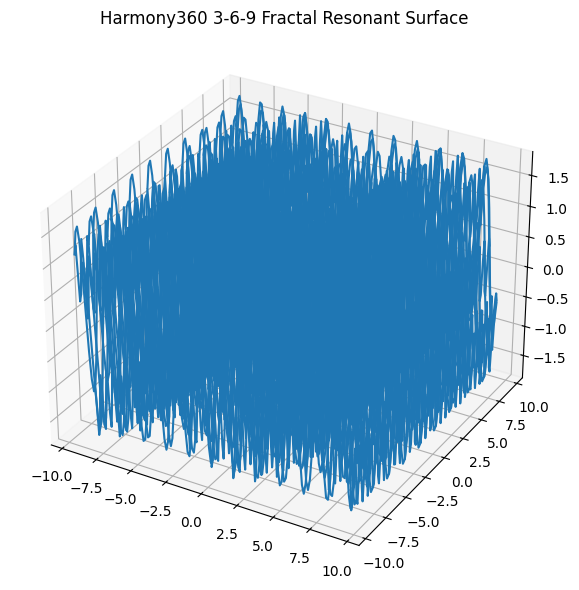

In [ ]:
# ============================================================
# Demo 1 – 3-D “mountain range” of 3-6-9 wavefield
# ============================================================
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

h360 = Harmony360()
grid = 150
x = np.linspace(-3*PI, 3*PI, grid)
y = np.linspace(-3*PI, 3*PI, grid)
X, Y = np.meshgrid(x, y)
Z = h360.fractal_harmonic_wavefield(X, Y)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)
ax.set_title("Harmony360 3-6-9 Fractal Resonant Surface")
plt.tight_layout(); plt.show()

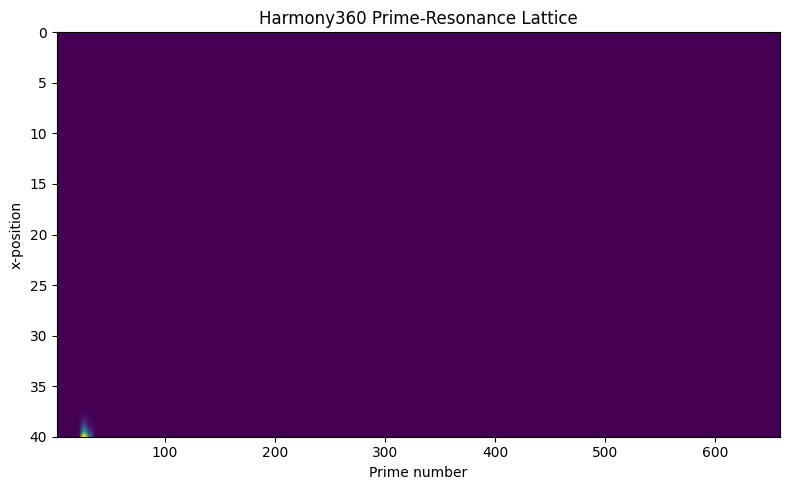

In [ ]:
# ============================================================
# Demo 2 – Prime-Resonance Lattice Heat-Map
# ============================================================
def first_n_primes(n):
    primes, p = [], 2
    while len(primes) < n:
        if all(p % q for q in range(2, int(math.sqrt(p))+1)):
            primes.append(p)
        p += 1
    return primes

primes = first_n_primes(120)
x_vals = np.linspace(0.0, 40.0, 400)

M = np.zeros((len(x_vals), len(primes)))
for i, xv in enumerate(x_vals):
    M[i, :] = [np.real(np.exp(2j*PI*h360.harmonic_frequency(p)*xv)) for p in primes]

plt.figure(figsize=(8, 5))
plt.imshow(M, aspect="auto",
           extent=(primes[0], primes[-1], x_vals[-1], x_vals[0]))
plt.title("Harmony360 Prime-Resonance Lattice")
plt.xlabel("Prime number"); plt.ylabel("x-position")
plt.tight_layout(); plt.show()

In [ ]:

# from harmony360.modules.geometry_engine import GeometryHarmonicsEngine

# Initialize geometry engine
geo = GeometryHarmonicsEngine()

# Render φ–π shell visual based on filament data
render_output = geo.render_phi_pi_shell(
    shell_radius=shapley_node["phi_shell_lock_radius"],
    title="Shapley Supercluster Filament",
    annotations={"resonant_freq": shapley_node["resonant_frequency_keV"]}
)

render_output.show()